# Part 2: Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [124]:
df = pd.read_csv('../datasets/clean_train.csv', low_memory=False)

In [151]:
df.select_dtypes(include='float64').columns

Index(['floor_area_sqm', 'resale_price', 'latitude', 'longitude',
       'mall_nearest_distance', 'hawker_nearest_distance',
       'mrt_nearest_distance', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_nearest_distance', 'pri_sch_latitude', 'pri_sch_longitude',
       'sec_sch_nearest_dist', 'sec_sch_latitude', 'sec_sch_longitude'],
      dtype='object')

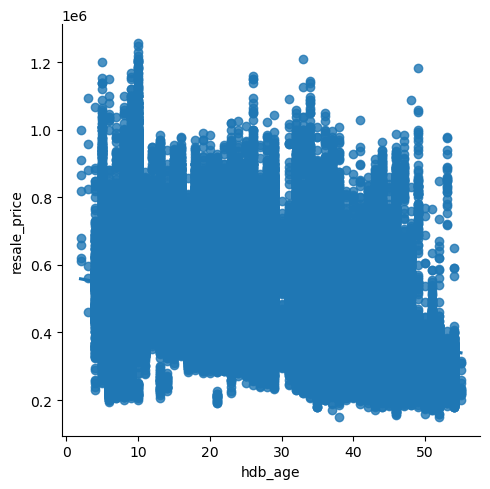

In [130]:
y = 'resale_price'
x = 'hdb_age'
sns.lmplot(x=x, y=y, data=df)
plt.show()

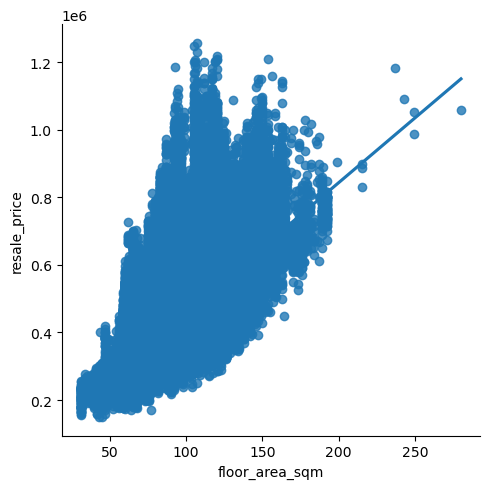

In [128]:
y = 'resale_price'
x = 'floor_area_sqm'

sns.lmplot(x=x, y=y, data=df)
plt.show()

## Investigating Distributions

In [4]:
#create custom histogram plot with mean and median lines showing
def custom_hist(num_bins, data, ax=None):
    if ax is None:
        ax = plt.gca()
    sns.histplot(data, bins=num_bins, kde=False, color='lavender', ax=ax)
    ax.axvline(data.mean(), label='mean', linestyle='--', color='red')
    ax.axvline(data.median(), label='median', linestyle='--', color='navy')
    ax.set_title('Histogram of {}'.format(data.name.replace('_', ' ').title()))
    ax.legend()
    return ax

### 1. Distribution of Floor Area Per Square Metre

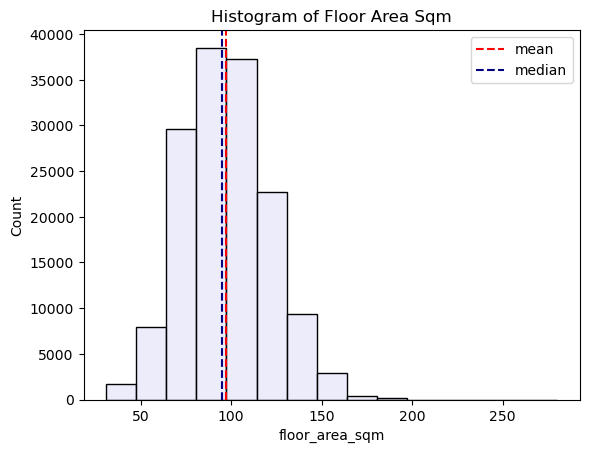

In [5]:
custom_hist(15,df['floor_area_sqm'])
plt.show()

### 2. Distribution of Resale Price

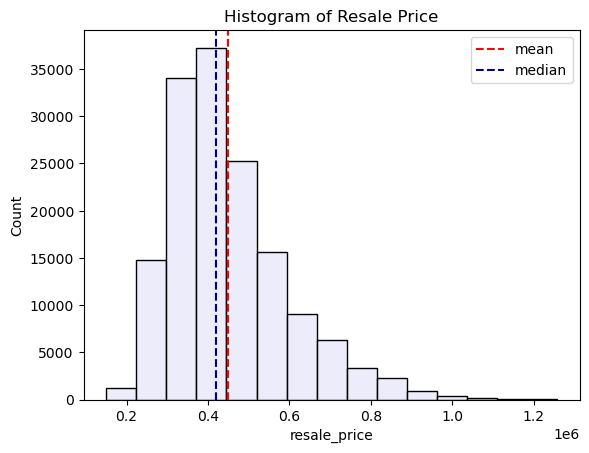

In [6]:
custom_hist(15,df['resale_price'])
plt.show()

### 3. Distribution of HDB Age

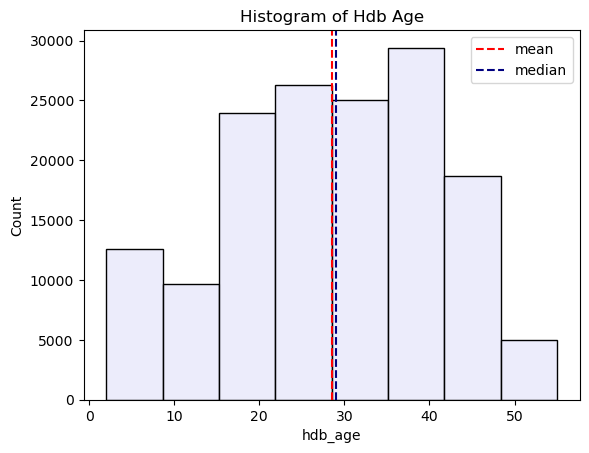

In [7]:
custom_hist(8,df['hdb_age'])
plt.show()

### 4. Distribution of Max Floor Level

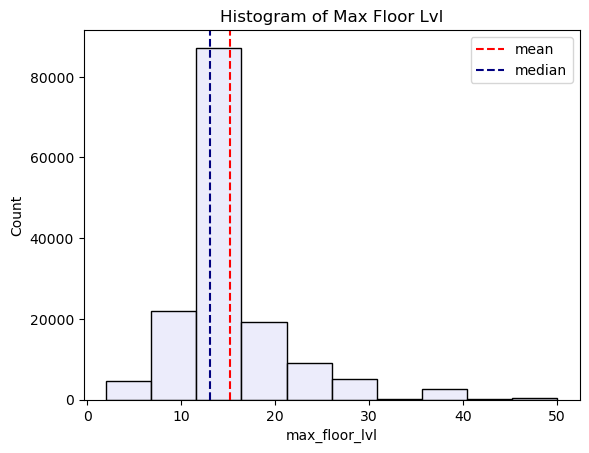

In [8]:
custom_hist(10,df['max_floor_lvl'])
plt.show()

### 5. Distribution of Storey Range Values

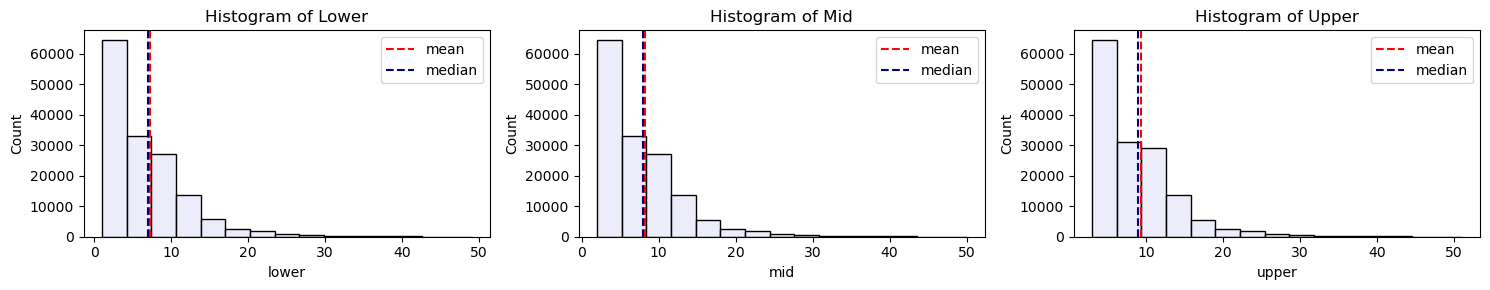

In [9]:
fig, axs = plt.subplots(1,3,figsize=(15, 3))

custom_hist(15,df['lower'],ax=axs[0])
custom_hist(15,df['mid'],ax=axs[1])
custom_hist(15,df['upper'],ax=axs[2])

plt.tight_layout()
plt.show()

### 6. Distribution of Total Dwelling Units

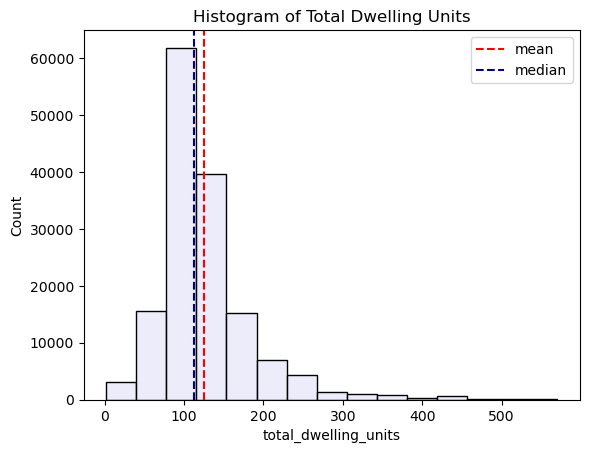

In [10]:
custom_hist(15,df['total_dwelling_units'])
plt.show()

### 7. Distribution of the Vacancy in Primary Schools

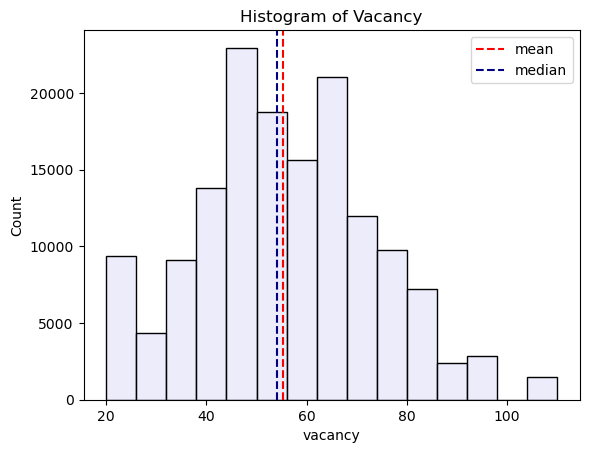

In [11]:
custom_hist(15,df['vacancy'])
plt.show()

### 8. Distribution of Types of Flats Sold
Note: Excluded 1room_sold since its values are binary

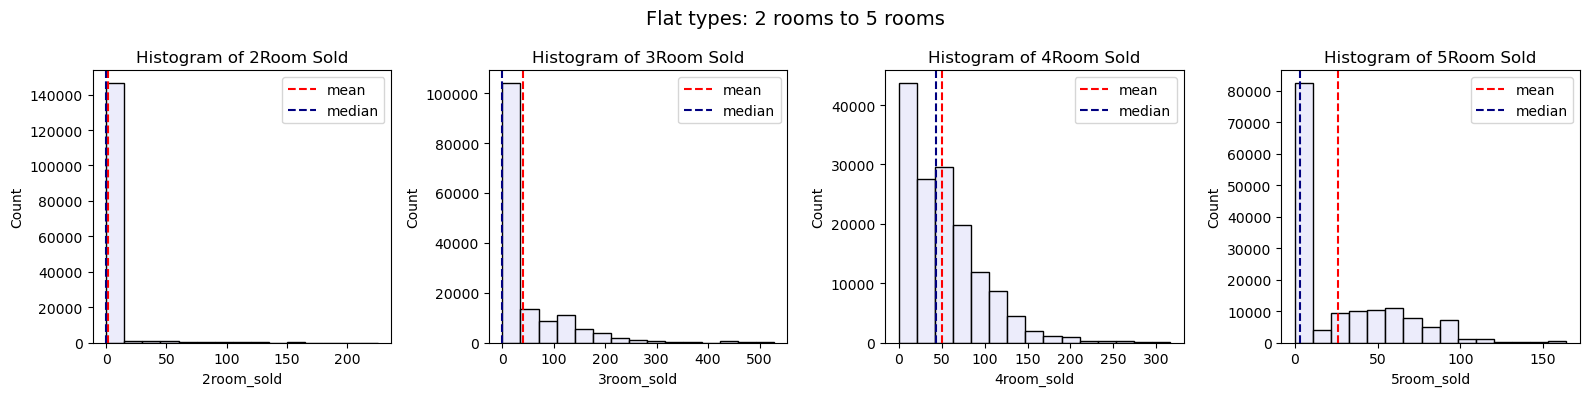

In [12]:
fig, axs = plt.subplots(1,4,figsize=(16, 4))

custom_hist(15,df['2room_sold'],ax=axs[0])
custom_hist(15,df['3room_sold'],ax=axs[1])
custom_hist(15,df['4room_sold'],ax=axs[2])
custom_hist(15,df['5room_sold'],ax=axs[3])

fig.suptitle('Flat types: 2 rooms to 5 rooms',fontsize=14)
plt.tight_layout()
plt.show()

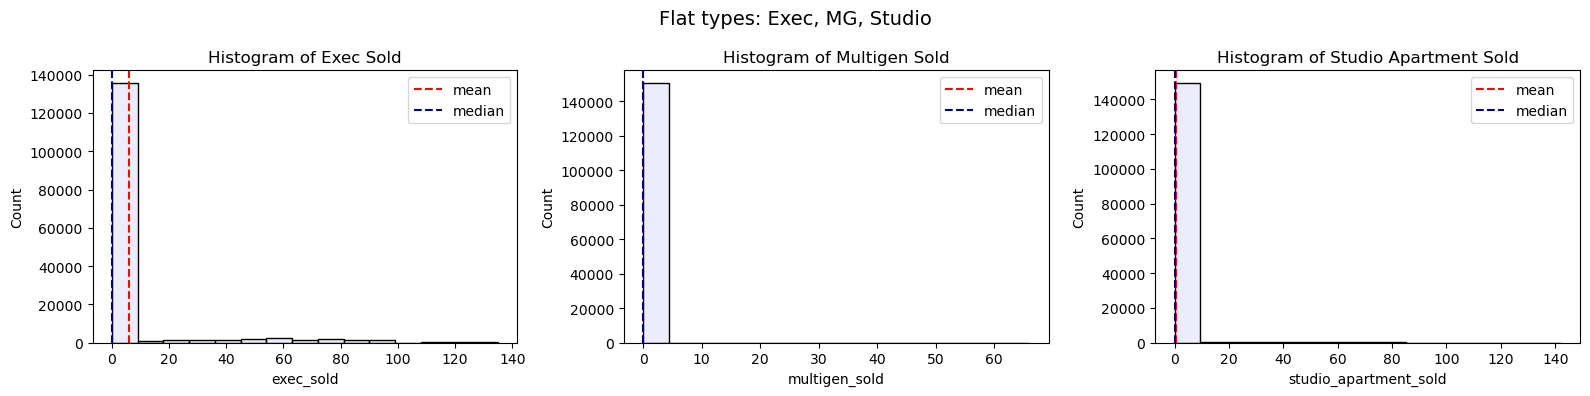

In [13]:
fig, axs = plt.subplots(1,3,figsize=(16, 4))

custom_hist(15,df['exec_sold'],ax=axs[0])
custom_hist(15,df['multigen_sold'],ax=axs[1])
custom_hist(15,df['studio_apartment_sold'],ax=axs[2])

fig.suptitle('Flat types: Exec, MG, Studio',fontsize=14)
plt.tight_layout()
plt.show()

### 9. Distribution of the Number of Rental Flats

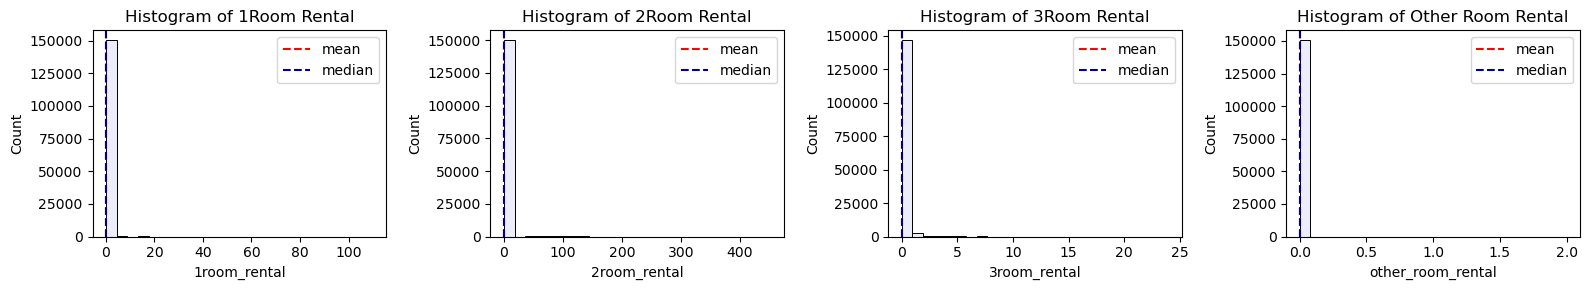

In [14]:
fig, axs = plt.subplots(1,4,figsize=(16, 3))

custom_hist(25,df['1room_rental'],ax=axs[0])
custom_hist(25,df['2room_rental'],ax=axs[1])
custom_hist(25,df['3room_rental'],ax=axs[2])
custom_hist(25,df['other_room_rental'],ax=axs[3])

plt.tight_layout()
plt.show()

### Observations:

1. **Right-skewed:**
    - Resale price
    - Max floor level
    - Total dwelling units
    - No of 3-room flats sold
    - No of 5-room flats sold
    - No of executive flats sold
    - Vacancy
<br>
2. **Left-skewed:**
    - No of malls within 1 km
<br>
3. **Symmetric:**
    - Floor area per square metre
    - HDB age
    - Lower value of storey range
    - Mid value of storey range
    - Upper value of storey range
    - No of 2-room flats sold
    - No of 4-room flats sold
    - No of multi-generation flats sold
    - No of studio apartments sold
    - No of 1-room rental flats
    - No of 2-room rental flats
    - No of 3-room rental flats
    - No of other room rental flats

## Investigating Trends Over Time

### 1. Trend of the Number of Flats Completed Over the Years

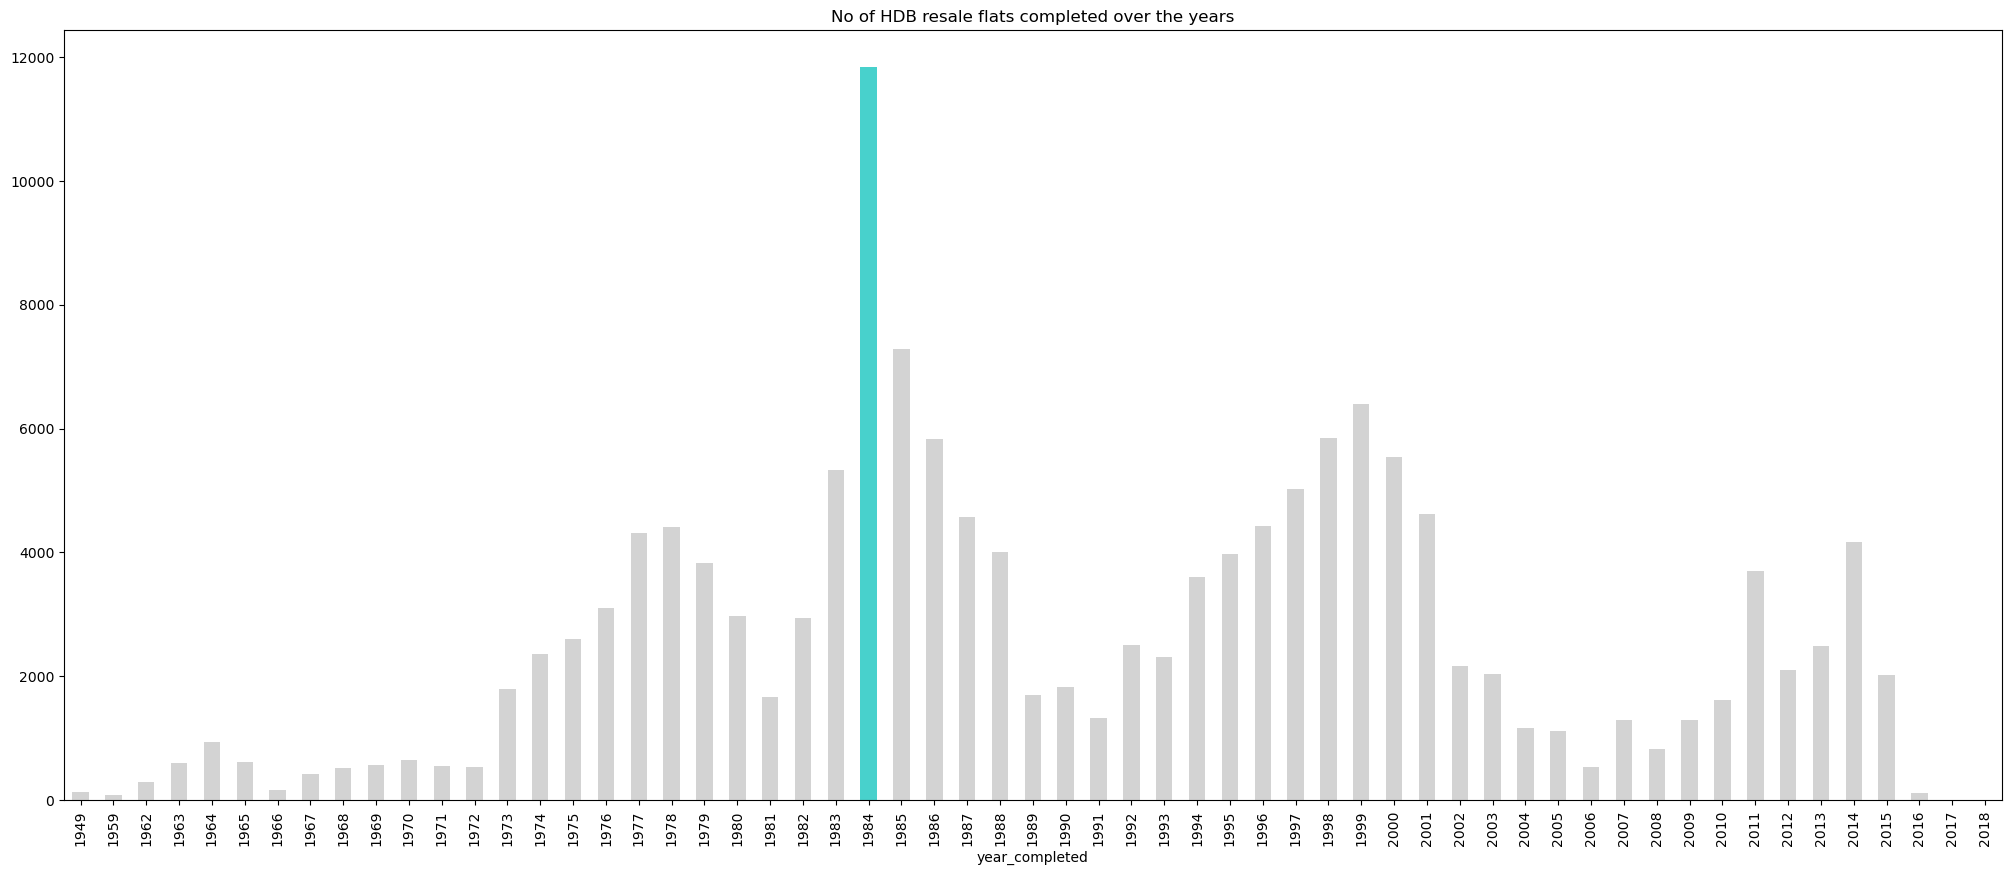

In [15]:
plt.figure(figsize=(25,10))
value_counts = df['year_completed'].value_counts().sort_index()
colours = ['mediumturquoise' if year in [1984] else 'lightgray' for year in value_counts.index]
df['year_completed'].value_counts().sort_index().plot(kind='bar',color=colours)
plt.title('No of HDB resale flats completed over the years')
plt.show()

### Observation:
Highest number of resale flats sold were completed in 1984. This is not suprising as HDB adopted the prefabrication technology in 1980 which allowed for rapid expansion of HDB flats.

Reference:
1. https://www.hdb.gov.sg/about-us/our-role/public-housing-a-singapore-icon
2. https://www.99.co/singapore/insider/hdb-flat-designs-through-the-decades/

### 2. Trend of Flats Sold by Transaction Months

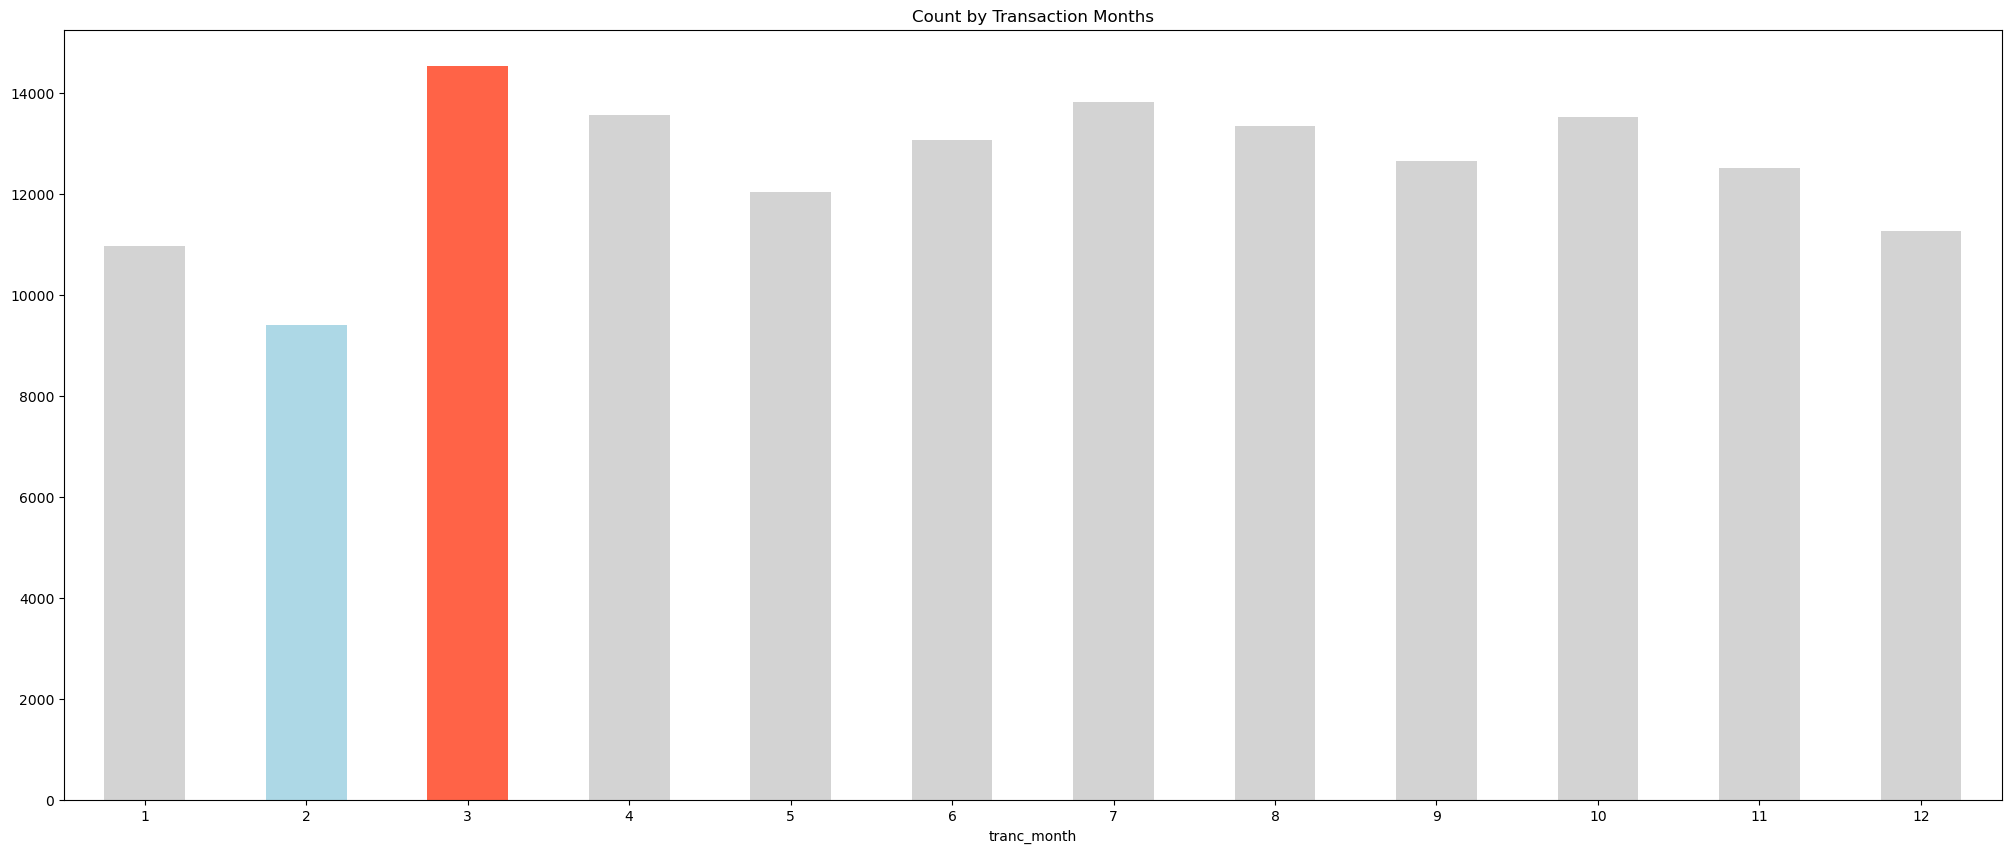

In [16]:
plt.figure(figsize=(25,10))
value_counts = df['tranc_month'].value_counts().sort_index()
colours = ['lightgrey'] * 12
colours[2] = 'tomato'
colours[1] = 'lightblue'
value_counts.plot(kind='bar',color=colours)
plt.title('Count by Transaction Months')
plt.xticks(rotation=0)
plt.show()

### Observation:
- The trend suggests that the least number of flats are sold in month 2 or February.
- The trend suggests that the highest number of flats are sold in month 3 or March. 
- This trend could be due to Chinese New year (CNY) which falls between late January and late February. Houseowners maybe reluctant to sell their homes during CNY.

Reference:
- https://simple.wikipedia.org/wiki/Chinese_New_Year#:~:text=The%20Chinese%20calendar%20adds%20a,Year%20from%201996%20to%202031.

### 3. Trend of Flats Sold by Transaction Year

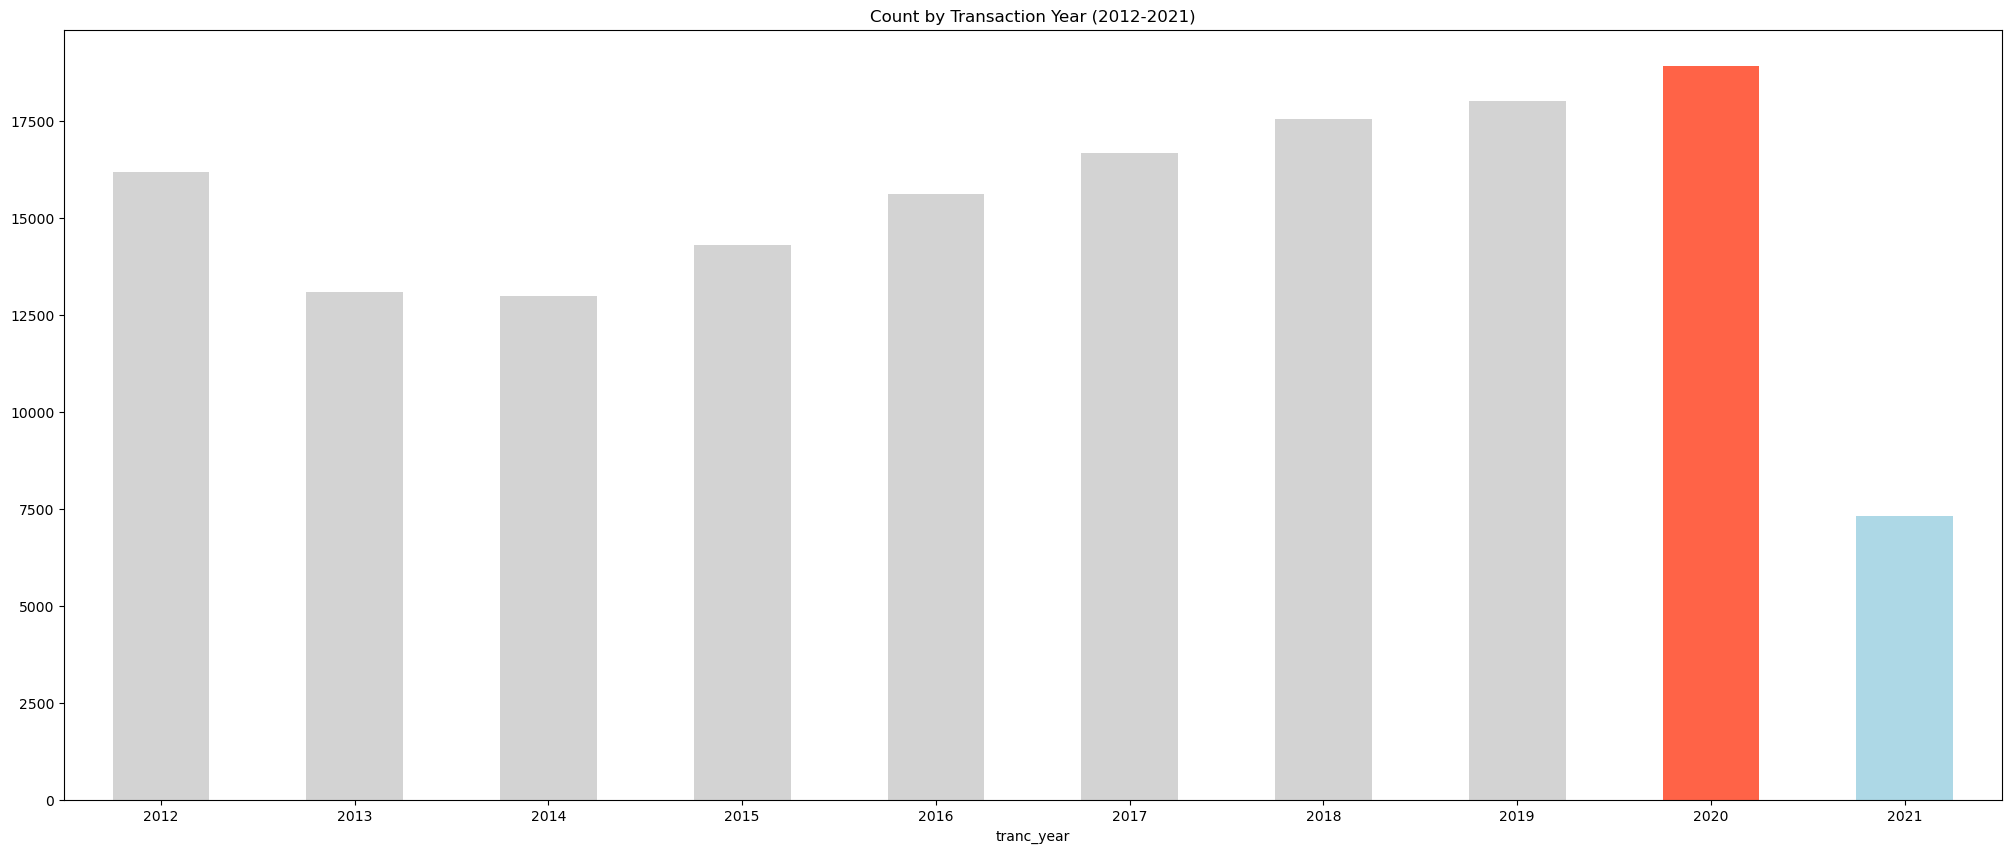

In [17]:
plt.figure(figsize=(25,10))
value_counts = df['tranc_year'].value_counts().sort_index()
plt.title('Count by Transaction Year (2012-2021)')
colours = ['lightgrey'] * 10
colours[8] = 'tomato'
colours[9] = 'lightblue'
value_counts.plot(kind='bar',color=colours)
plt.xticks(rotation=0)
plt.show()

### Observation:
- The trend suggests that the least number of flats were sold in 2021.
- The trend suggests that the highest number of flats were sold in 2020.
- This trend is unexpected since some people have lost their jobs during the Covid-19 pandemic.
- Overall, there has been a steady increase in number of resale flats sold from 2014 to 2020.

Some postal codes have value 'NIL'.

Reference:
1. https://www.ura.gov.sg/Corporate/-/media/Corporate/Property/PMI-Online/List_Of_Postal_Districts.pdf

## Investigating Categorical Variables

In [18]:
#custom plot for categorical variables
def cat_plot(col,df,figsize,colour):
    value_counts = df[col].value_counts()
    ax = value_counts.plot(kind='barh', figsize=figsize, color=colour)
    for i, v in enumerate(value_counts):
        ax.text(v + 0.5, i, str(v), color='black', va="center")
    plt.title(f'Count by {col.replace("_", " ").title()}')
    plt.show()

### 1. Count of Flat Models

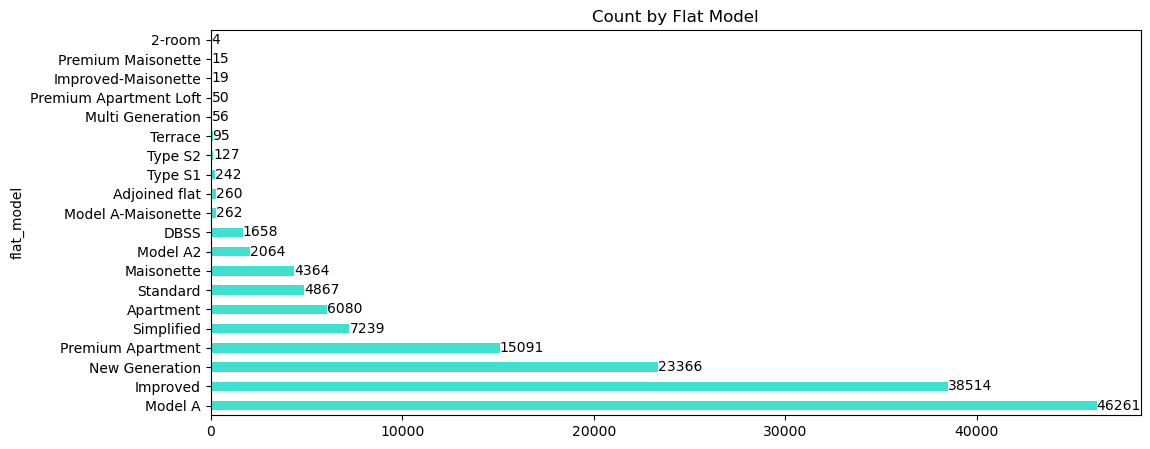

In [19]:
cat_plot('flat_model',df,(12,5),'turquoise')

### Observation:
Most popular model is Model A which was introduced in the 1980s.
Least popular model is the 2-room.

Reference:
1. https://www.teoalida.com/singapore/hdbfloorplans/#:~:text=1980s%20typical%20HDB%20floor%20plans,%2DRoom%20(84%20sqm).

### 2. Count of Flat Types

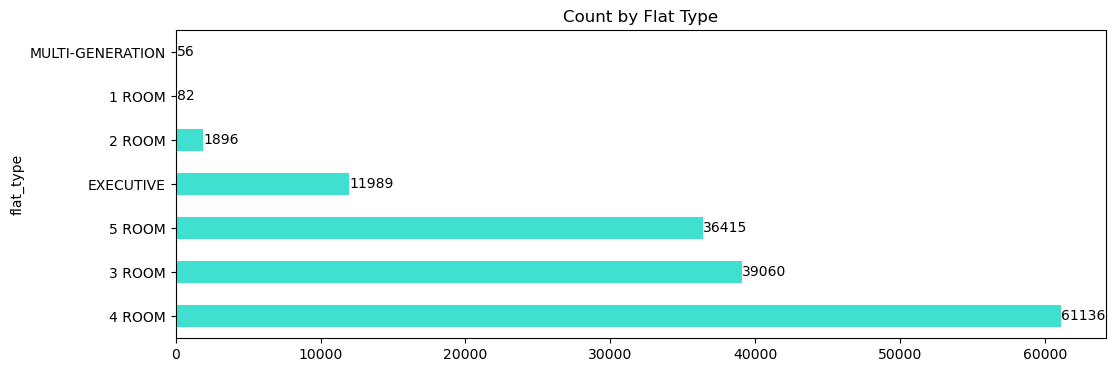

In [20]:
cat_plot('flat_type',df,(12,4),'turquoise')

### Observation:
Most popular resale flat type is the 4-room.
Least popular resale flat type is the multi-generation.

### 3. Count of Planning Area

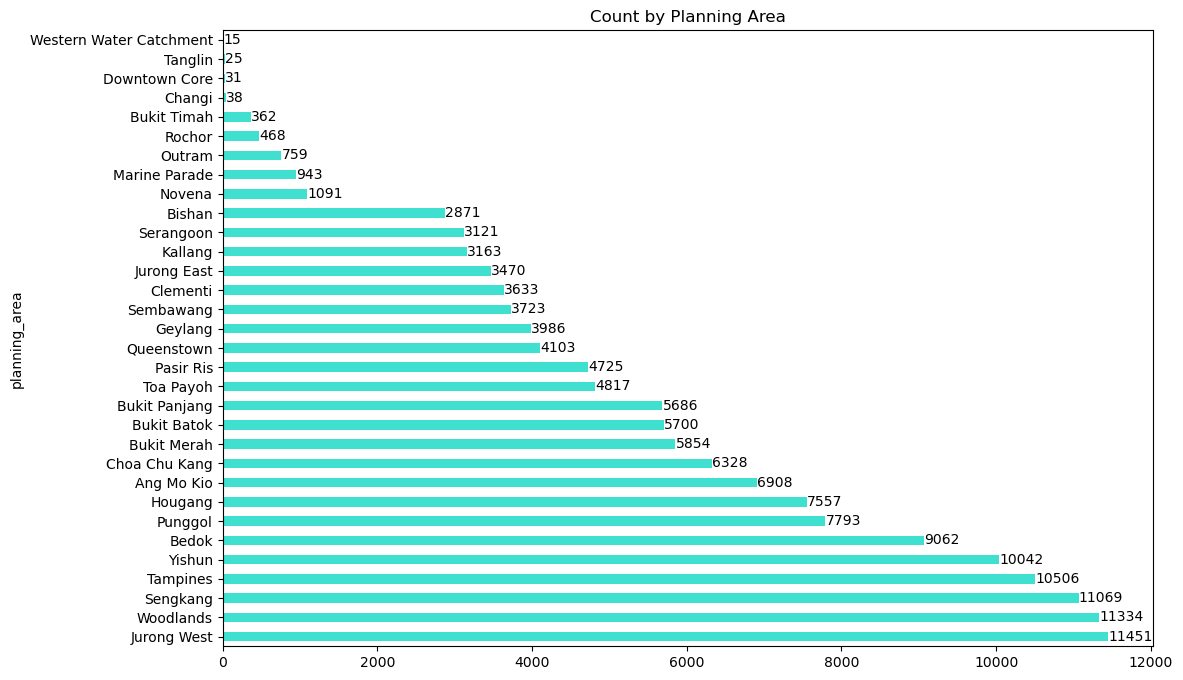

In [21]:
cat_plot('planning_area',df,(12,8),'turquoise')

### Observation:
Most popular planning area is Jurong West which is not surprising since it is the largest planning area in the west.

### 4. Count of Mrt Names

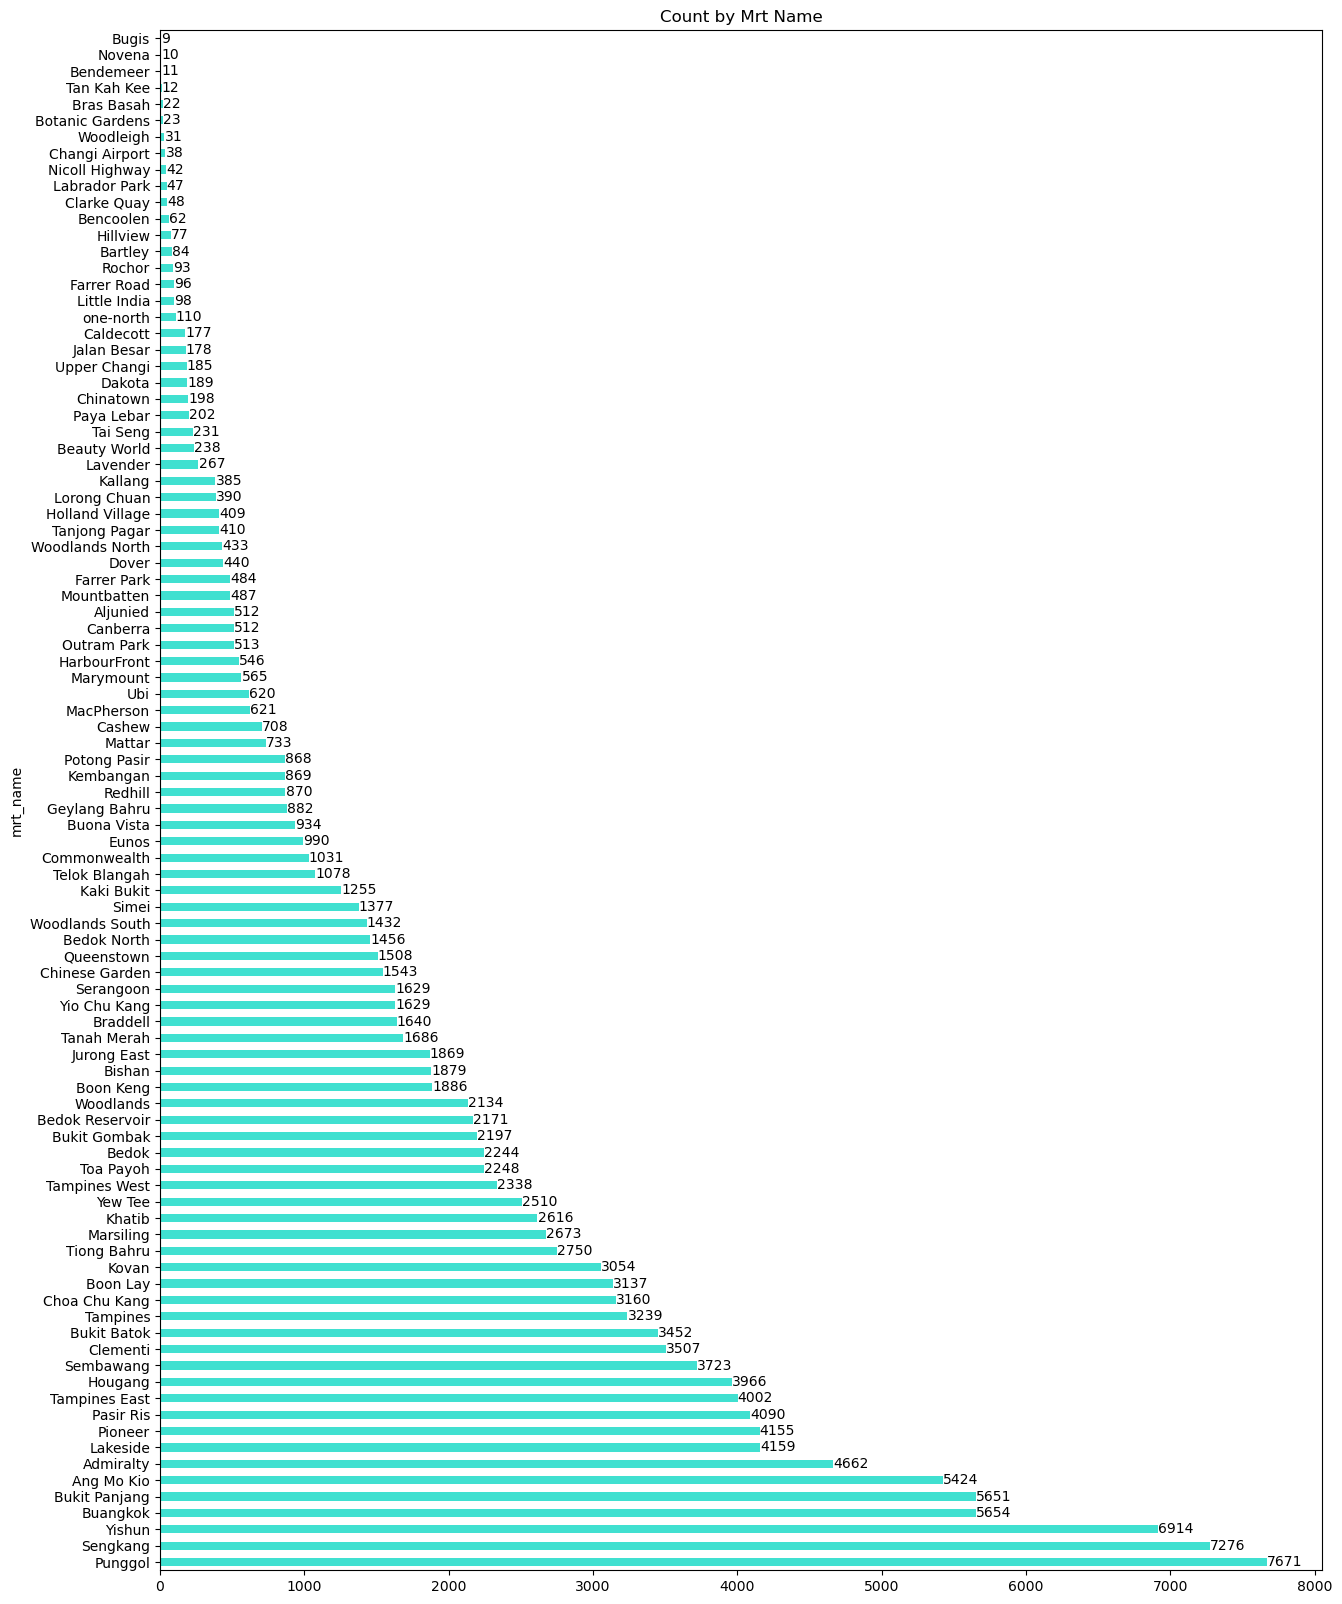

In [22]:
cat_plot('mrt_name',df,(15,20),'turquoise')

### Observation:
Most popular mrt is Punggol, followed by Sengkang. Punggol and Sengkang are relatively new towns and this could be due to the flats achieving the minimum occupation period (MOP) and thus can be sold for a higher price compared to older flats.

### 4. Count of Postal Sectors

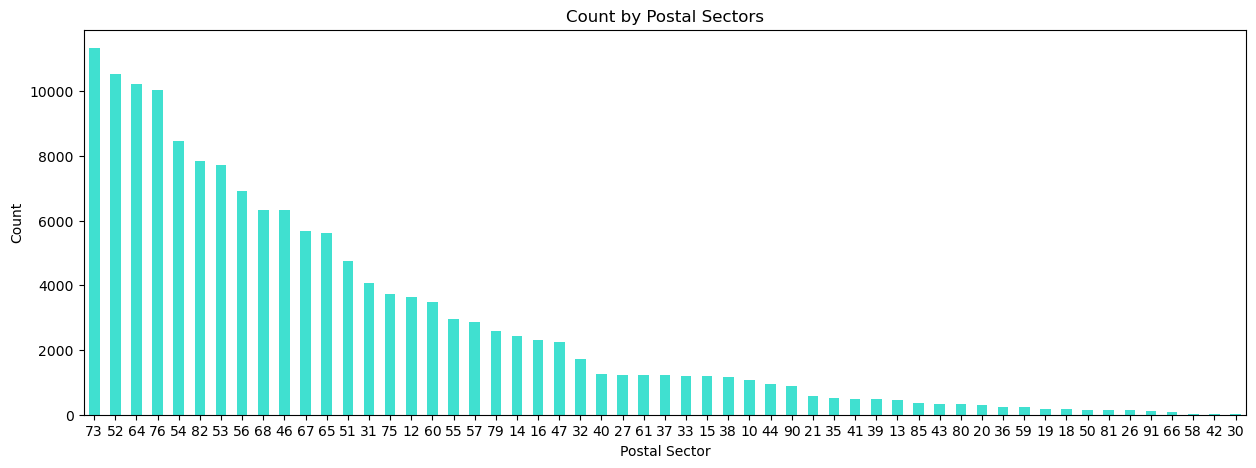

In [23]:
postal_sectors = []

for entry in df['postal']:
    postal_sectors.append(str(entry)[:2])

plt.figure(figsize=(15,5))
pd.Series(postal_sectors).value_counts().plot(kind='bar',color='turquoise')
plt.xticks(rotation=0)
plt.title('Count by Postal Sectors')
plt.xlabel('Postal Sector')
plt.ylabel('Count')
plt.show()

### Observation:
Most resale flats come under the Woodgrove or postal sector '73' (in Woodlands) while the least come under Thomson or postal sector '30'.

Reference:
1. https://www.mingproperty.sg/singapore-district-code/
2. https://www.ura.gov.sg/Corporate/-/media/Corporate/Property/PMI-Online/List_Of_Postal_Districts.pdf

## Investigating Discrete Variables

### 1. Count of Malls By Distance

In [24]:
#create custom plot for discrete variables
def dis_plot(col,df,degree,ax=None,label=None):
    if ax is None:
        ax = plt.gca()
    value_counts = df[col].value_counts().sort_index()
    colours = ['silver' if count != value_counts.max() else 'palevioletred' for count in value_counts]
    value_counts.plot(kind='bar', color=colours, ax=ax)
    
    if label==1:
        for i, v in enumerate(value_counts):
            ax.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
        
    ax.set_title(f'Count by {col.replace("_", " ").title()}')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=degree) 
    return ax

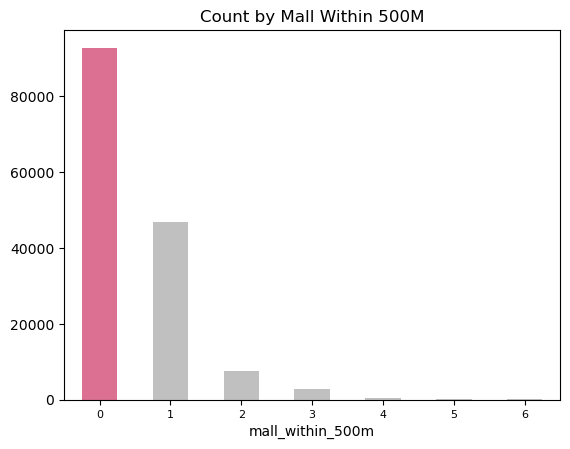

In [25]:
dis_plot('mall_within_500m',df,0)
plt.show()

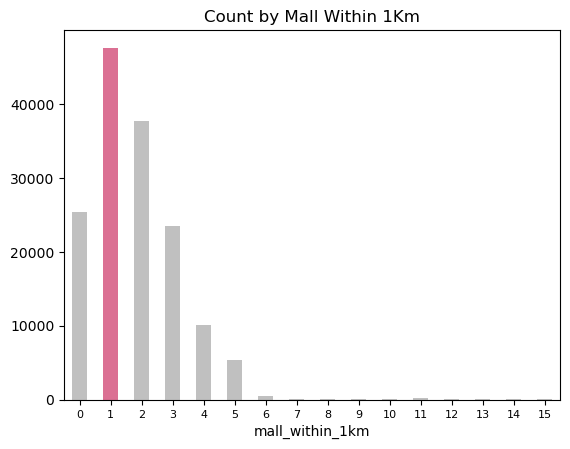

In [26]:
dis_plot('mall_within_1km',df,0)
plt.show()

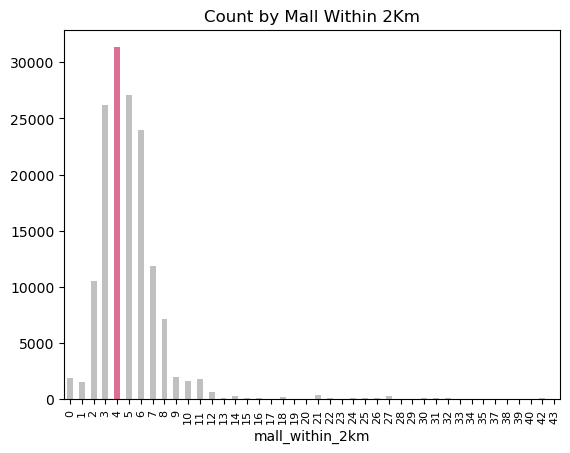

In [27]:
dis_plot('mall_within_2km',df,90)
plt.show()

In [28]:
df[df['mall_within_2km']==df['mall_within_2km'].max()]['address'].value_counts()

address
662, BUFFALO RD    13
663, BUFFALO RD    11
10, SELEGIE RD      9
Name: count, dtype: int64

#### Observations:
- Most resale flats sold do <b>not</b> have any malls within 500 m.
- However, most resale flats sold have 1 mall within 1 km.
- Most resale flats sold have 4 malls within 2 km.
- The highest number of malls correspond to flats in the Little India area, specifically Buffalo and Selegie road flats.

### 2. Count of Hawker Centres By Distance

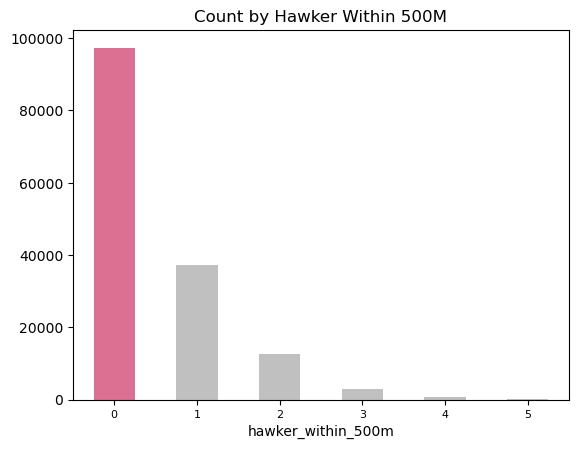

In [29]:
dis_plot('hawker_within_500m',df,0)
plt.show()

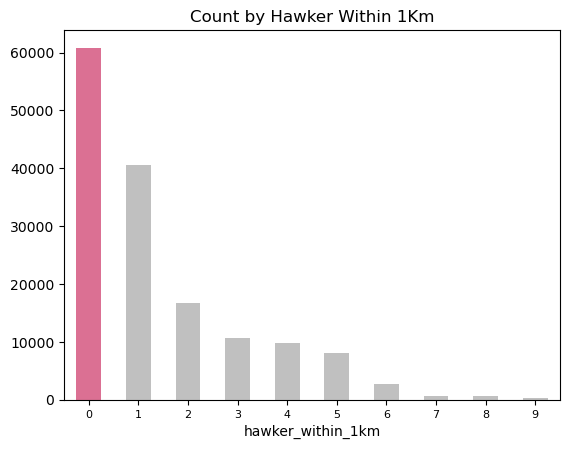

In [30]:
dis_plot('hawker_within_1km',df,0)
plt.show()

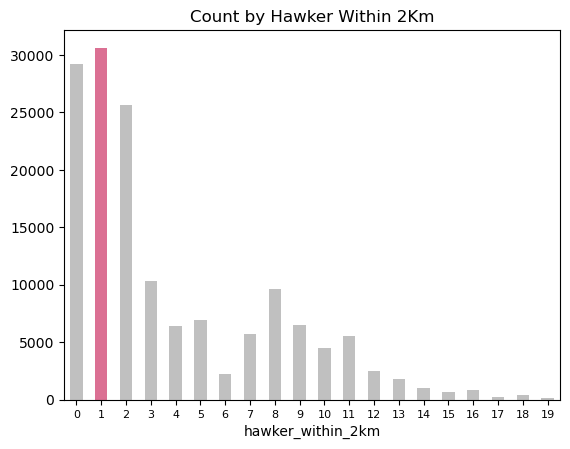

In [31]:
dis_plot('hawker_within_2km',df,0)
plt.show()

#### Observations:
- Most resale flats sold do not have any hawker centres within 500 m or 1 km.
- Most resale flats sold have 1 hawker centre within 2 km.

In [32]:
#find the columns with binary values
for col in df.columns:
    if len(df[col].value_counts()) == 2: print(col)

commercial
market_hawker
multistorey_carpark
precinct_pavilion
1room_sold
bus_interchange
mrt_interchange
pri_sch_affiliation
affiliation


### 3. Count of resale flats sold with a market or a hawker center in the same block

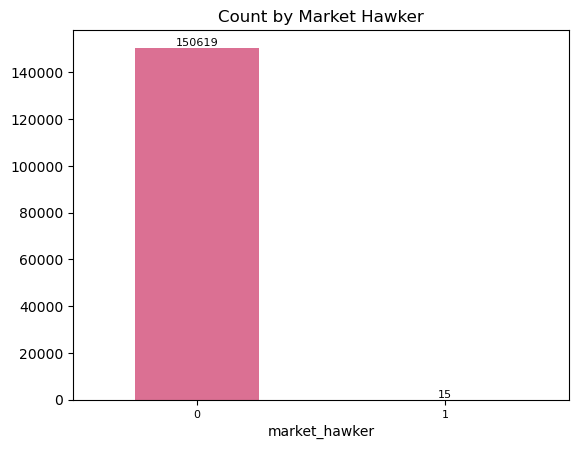

In [33]:
dis_plot('market_hawker',df,0,label=1)
plt.show()

#### Observation:
- Most resale flats sold do <b>not</b> have either a market or hawker centre in the same block.
- This could be because home owners want convenience.

### 4. Count of resale flats sold with commercial space

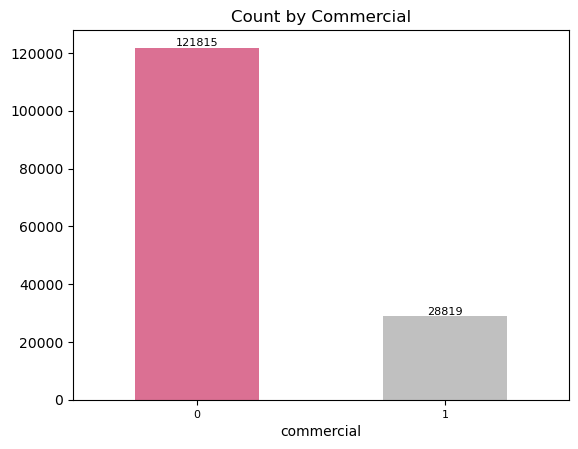

In [34]:
dis_plot('commercial',df,0,label=1)
plt.show()

#### Observation:
- Most resale flats sold do <b>not</b> have a commercial space.
- This could be because home owners want convenience, specifically shops nearby.

### 5. Count of resale flats sold with a multistorey carpark

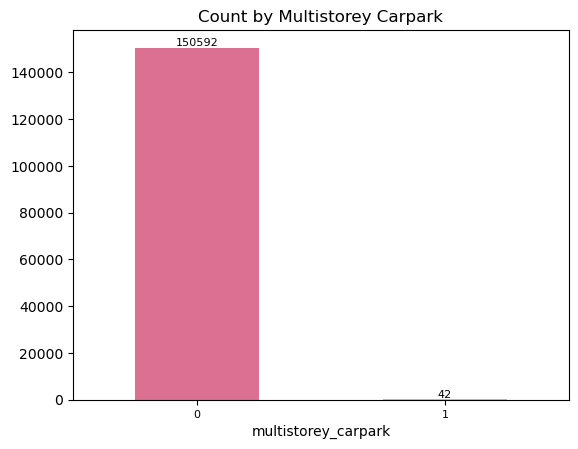

In [35]:
dis_plot('multistorey_carpark',df,0,label=1)
plt.show()

#### Observation:
- Most resale flats sold do <b>not</b> have a multistorey carpark.
- This could be because home owners want convenience since there are 471 000 households that own cars with approximately 56 000 with 2 cars (information from 2022).

Reference:
1. https://www.straitstimes.com/singapore/politics/12-per-cent-of-car-owning-households-in-singapore-have-2-cars-less-than-3-per-cent-own-3-or-more

### 6. Count of resale flats sold with a precint pavilion

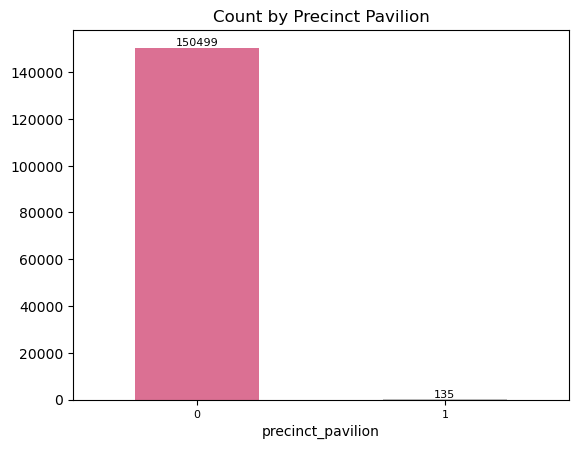

In [36]:
dis_plot('precinct_pavilion',df,0,label=1)
plt.show()

#### Observation:
- Most resale flats sold do not have a precint pavilion.
- Note that HDB started building precint pavilions for flats in the 90s.

Reference:
1. https://www.mnd.gov.sg/newsroom/parliament-matters/q-as/view/written-answer-by-ministry-of-national-development-on-ratio-of-total-number-of-dwelling-units-to-pavilions-and-total-number-of-void-decks-to-blocks-in-current-and-new-hdb-developments

### 7. Count of 1 room resale flats

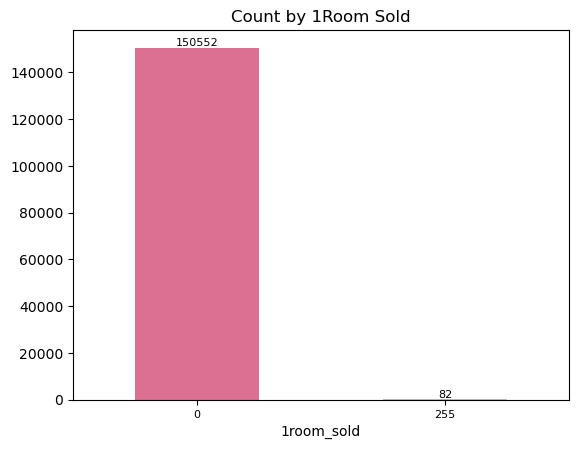

In [37]:
dis_plot('1room_sold',df,0,label=1)
plt.show()

### 8. Count of resale flats sold by bus interchange

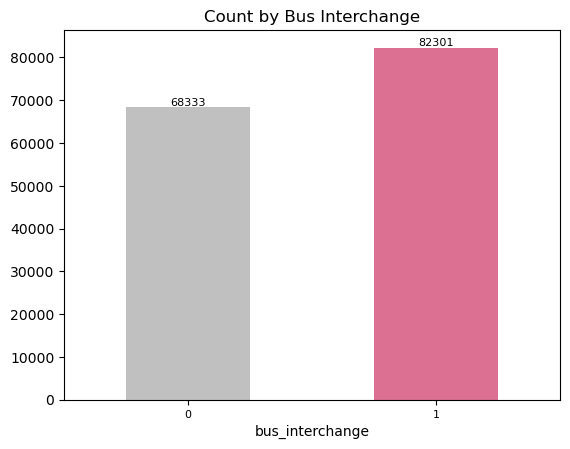

In [38]:
dis_plot('bus_interchange',df,0,label=1)
plt.show()

### 9. Count of resale flats sold by MRT interchange

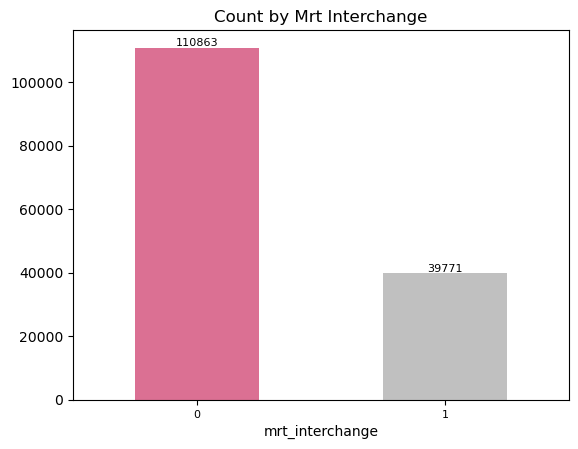

In [39]:
dis_plot('mrt_interchange',df,0,label=1)
plt.show()

### 10. Count of resale flats sold by primary school affiliation

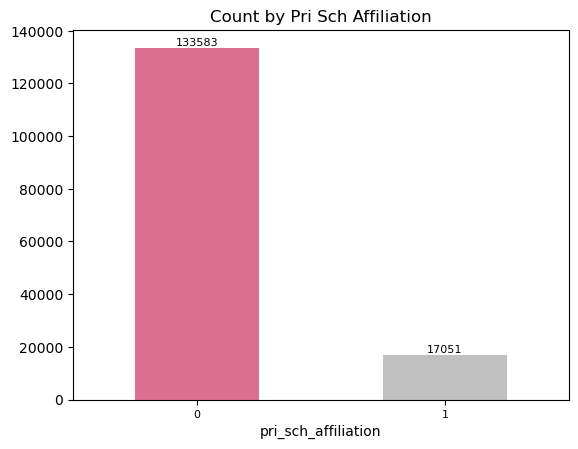

In [40]:
dis_plot('pri_sch_affiliation',df,0,label=1)
plt.show()

### 11. Count of resale flats sold by secondary school affiliation

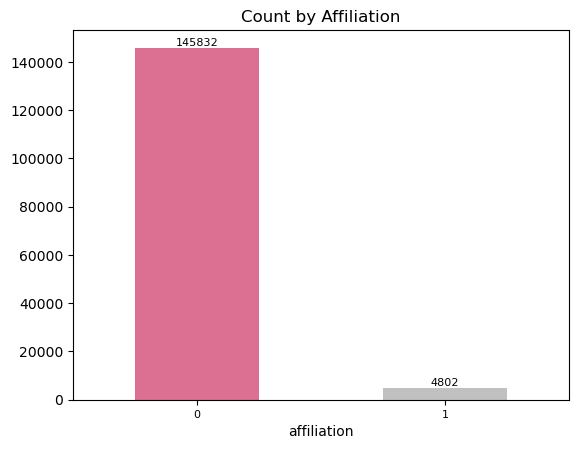

In [41]:
dis_plot('affiliation',df,0,label=1)
plt.show()

## Investigating Relationships between Feature of Interest & Target (Resale Price)

In [42]:
#create custom plot to show relationship between mean resale price and chosen feature
def custom_rs(col):
    mean_prices = df.groupby(col)['resale_price'].mean()

    mean_prices_df = mean_prices.reset_index().sort_values(by='resale_price', ascending=False)

    colours = ['lightgray'] * len(mean_prices_df)
    colours[len(mean_prices_df) - 1] = 'lightpink'
    colours[0] = 'hotpink'

    sns.barplot(y=col, x='resale_price', data=mean_prices_df, palette=colours)
    ylabel = col.replace('_',' ').title()
    plt.ylabel(ylabel)
    plt.xlabel('Mean Resale Price')
    plt.title(f'Mean Resale Prices by {ylabel}')
    plt.tight_layout()
    plt.show()

### 1. Town vs Mean Resale Price

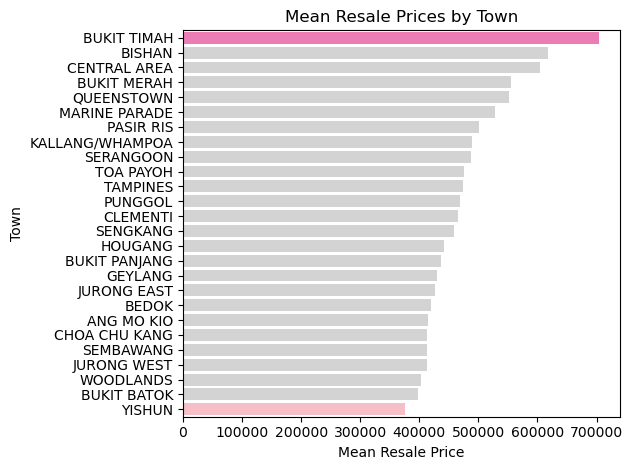

In [43]:
custom_rs('town')

### 2. Flat Type vs Mean Resale Price

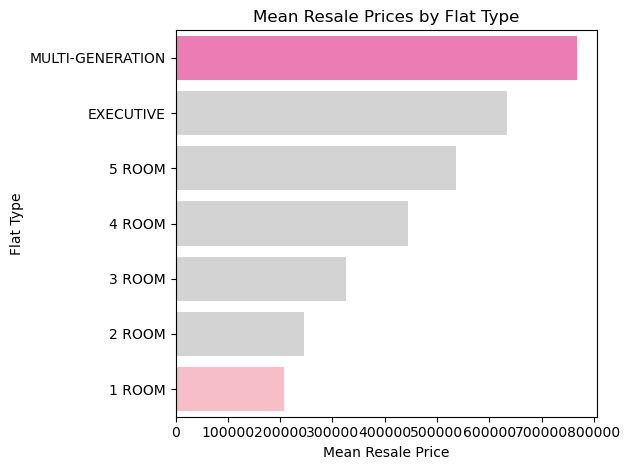

In [44]:
custom_rs('flat_type')

### 3. Flat Model vs Mean Resale Price

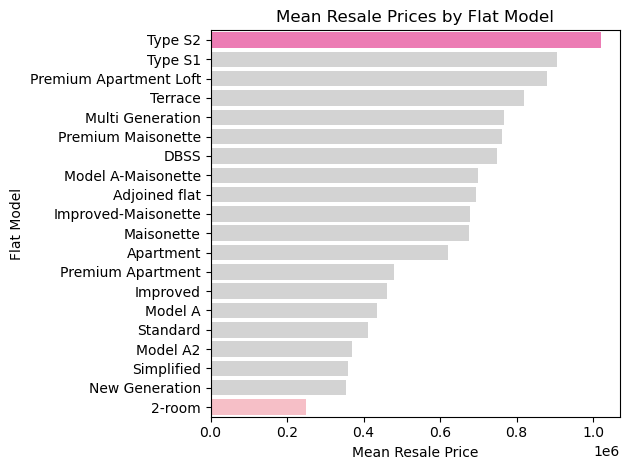

In [45]:
custom_rs('flat_model')

### 4. Planning Area vs Mean Resale Price

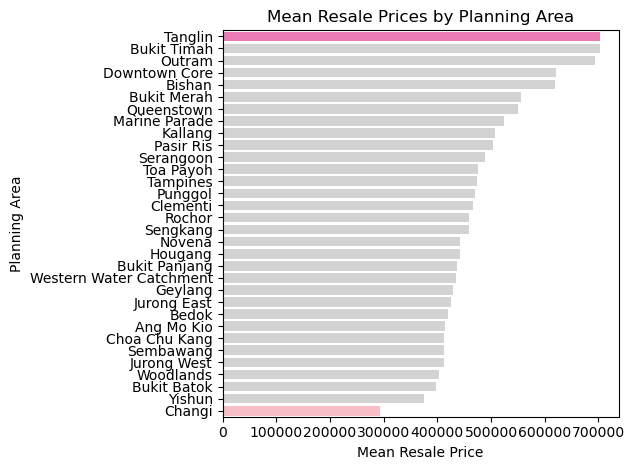

In [46]:
custom_rs('planning_area')

In [47]:
def heatmap(selected_columns,figsize):
    df_encoded = pd.get_dummies(df[selected_columns], drop_first=True)
    corr_matrix = df_encoded.corr()
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    annot_array = np.where(abs(corr_matrix) > 0.5, corr_matrix.round(2), "")
    sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, linewidths=.5, ax=ax, annot=annot_array, fmt="")
    plt.show()

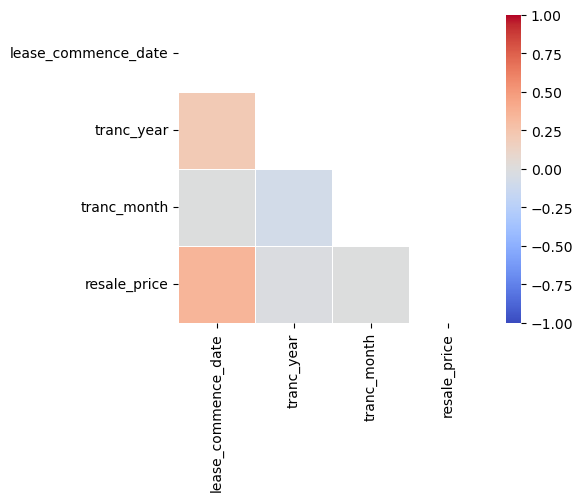

In [48]:
selected_columns = ['lease_commence_date', 'tranc_year', 'tranc_month','resale_price']
heatmap(selected_columns,(5,4))

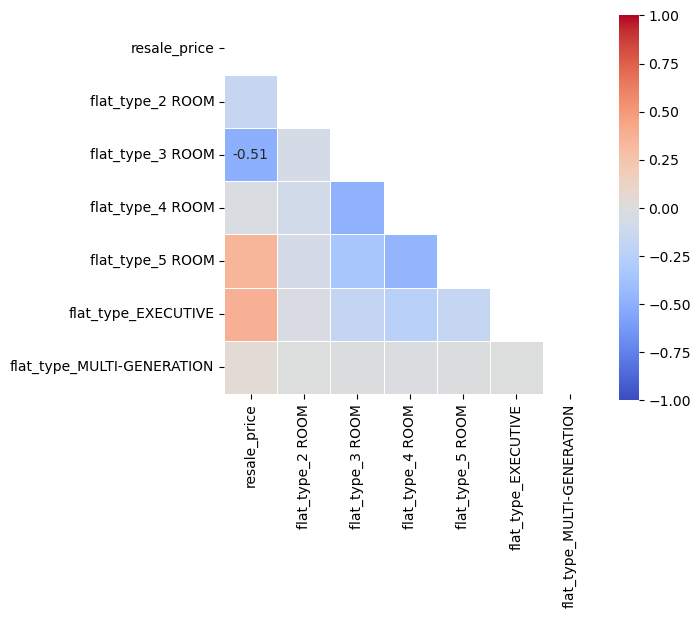

In [49]:
selected_columns = ['flat_type', 'resale_price']
heatmap(selected_columns,(6,5))

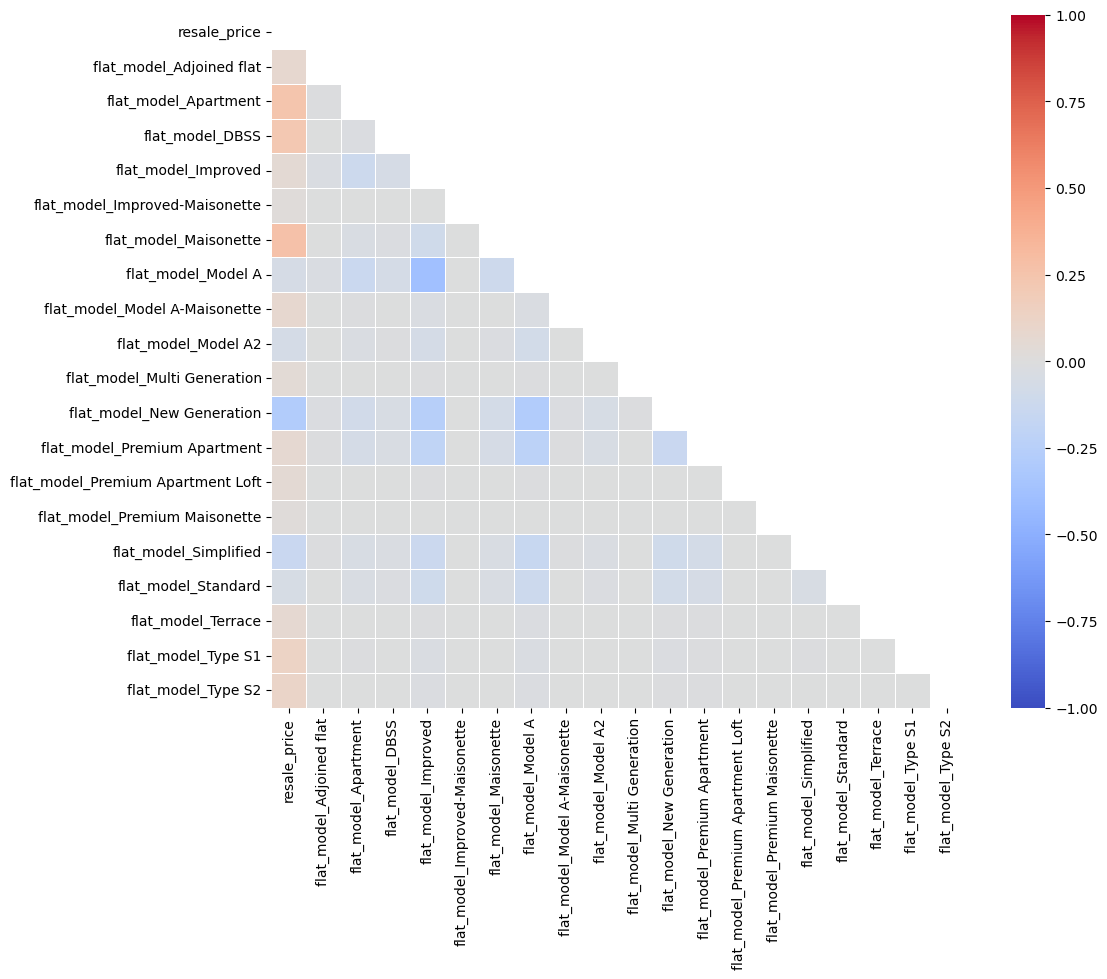

In [50]:
selected_columns = ['flat_model', 'resale_price']
heatmap(selected_columns,(12,9))

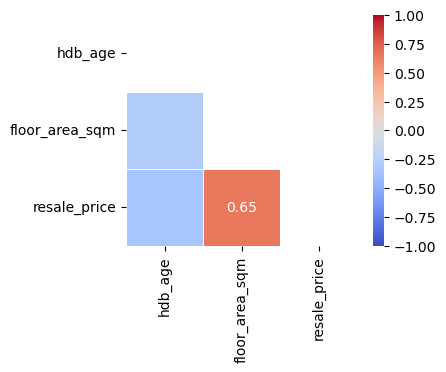

In [51]:
selected_columns = ['hdb_age', 'floor_area_sqm','resale_price']
heatmap(selected_columns,(4,3))

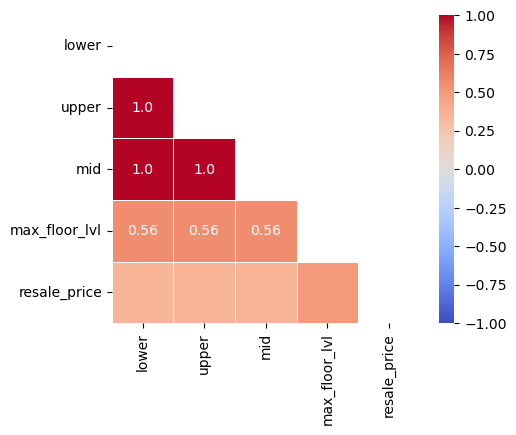

In [52]:
selected_columns = ['lower', 'upper', 'mid', 'max_floor_lvl','resale_price']
heatmap(selected_columns,(5,4))

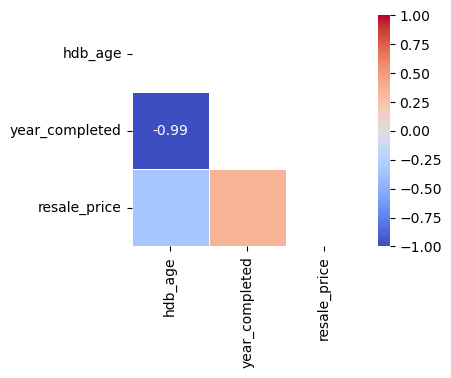

In [53]:
selected_columns = ['hdb_age', 'year_completed','resale_price']
heatmap(selected_columns,(4,3))

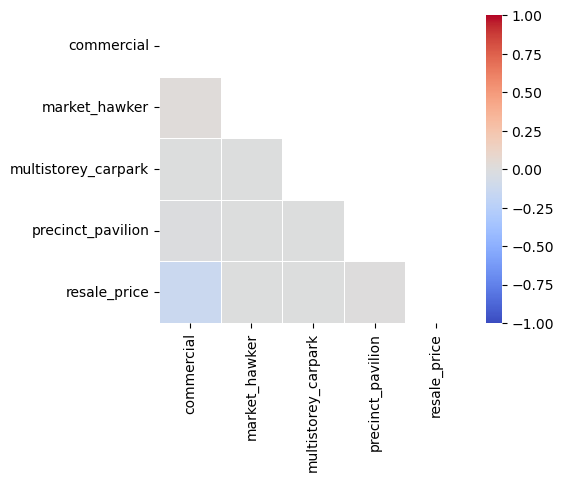

In [54]:
selected_columns = ['commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion','resale_price']
heatmap(selected_columns,(5,4))

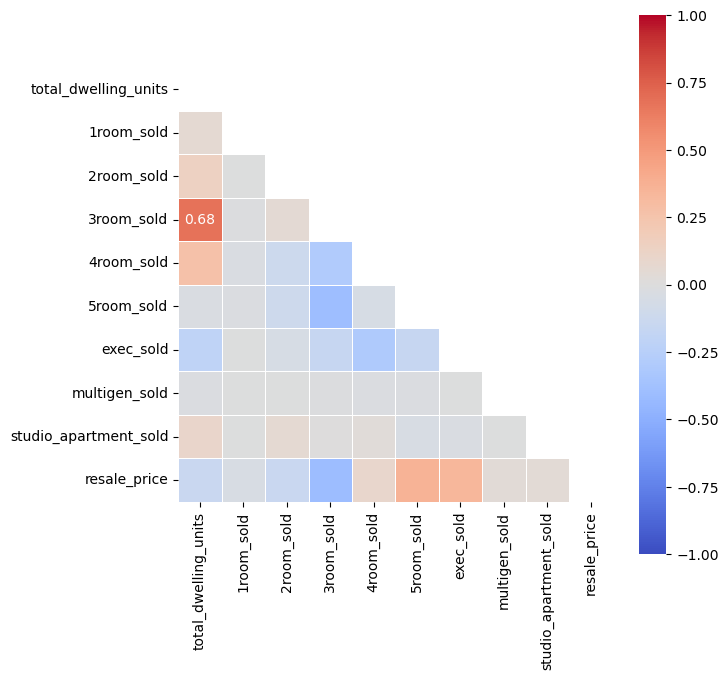

In [55]:
selected_columns = ['total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold','resale_price']
heatmap(selected_columns,(7,7))

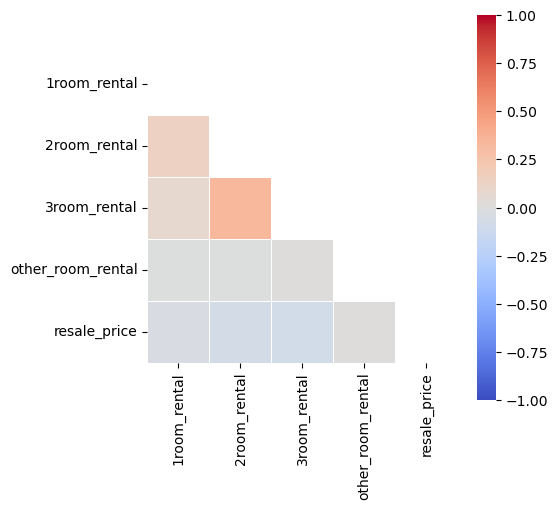

In [56]:
selected_columns = ['1room_rental', '2room_rental', '3room_rental',
       'other_room_rental','resale_price']
heatmap(selected_columns,(5,5))

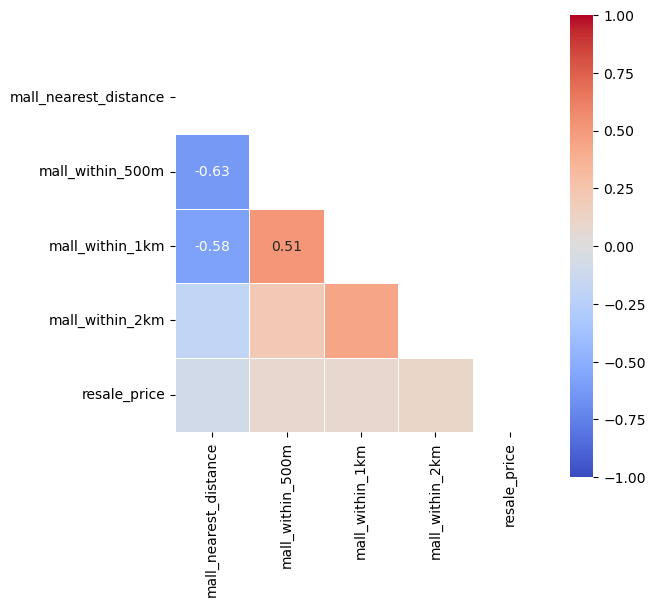

In [57]:
selected_columns = ['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km','resale_price']
heatmap(selected_columns,(6,6))

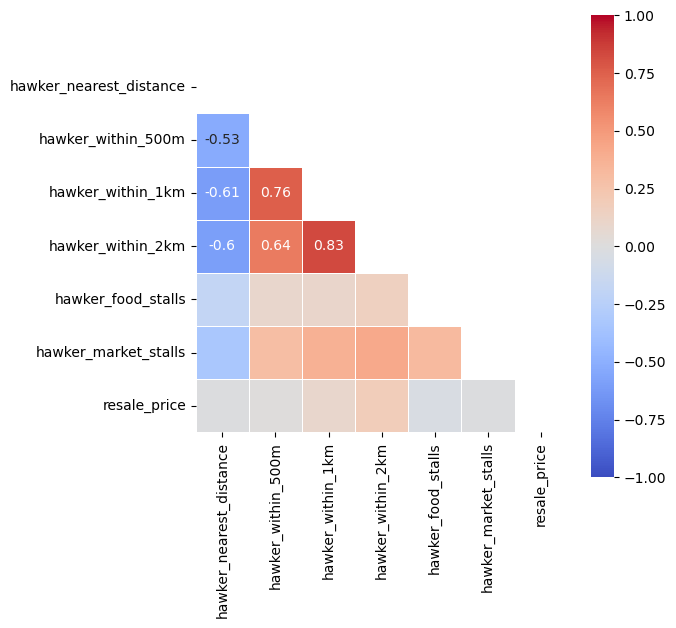

In [58]:
selected_columns = ['hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls','resale_price']
heatmap(selected_columns,(6,6))

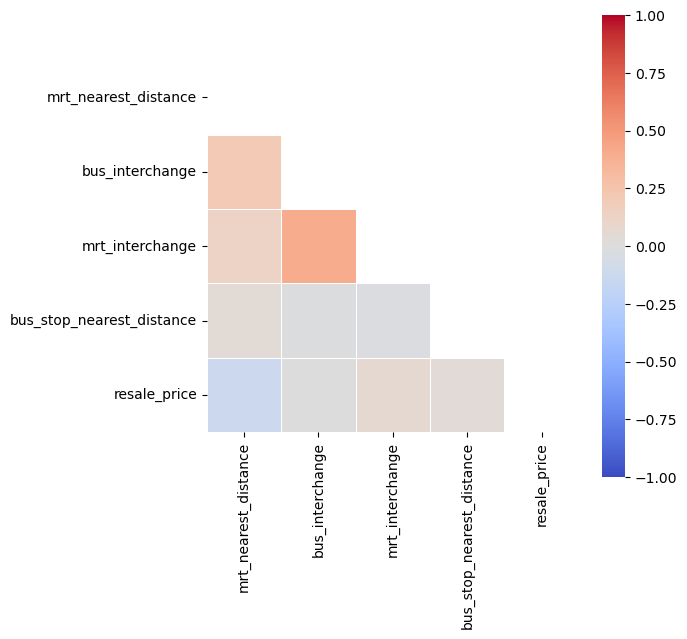

In [59]:
selected_columns = ['mrt_nearest_distance', 
       'bus_interchange', 'mrt_interchange', 
       'bus_stop_nearest_distance','resale_price']
heatmap(selected_columns,(6,6))

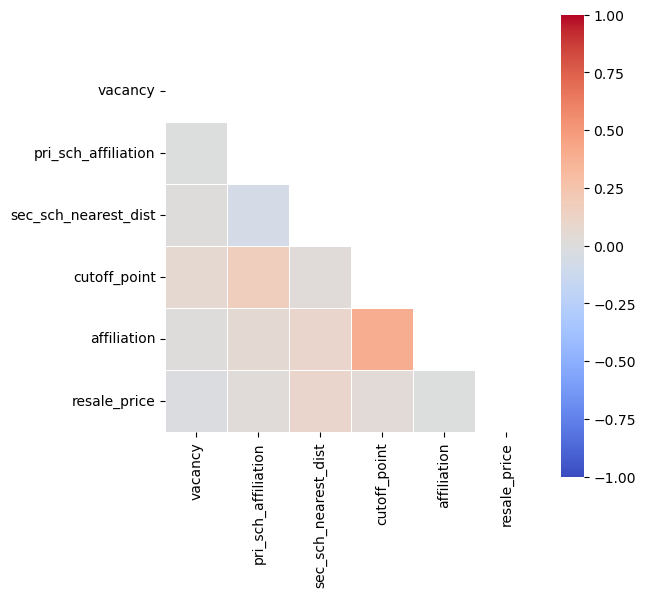

In [60]:
selected_columns = ['vacancy', 'pri_sch_affiliation', 'sec_sch_nearest_dist', 
       'cutoff_point', 'affiliation','resale_price']
heatmap(selected_columns,(6,6))

In [61]:
df.columns

Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'address', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance'

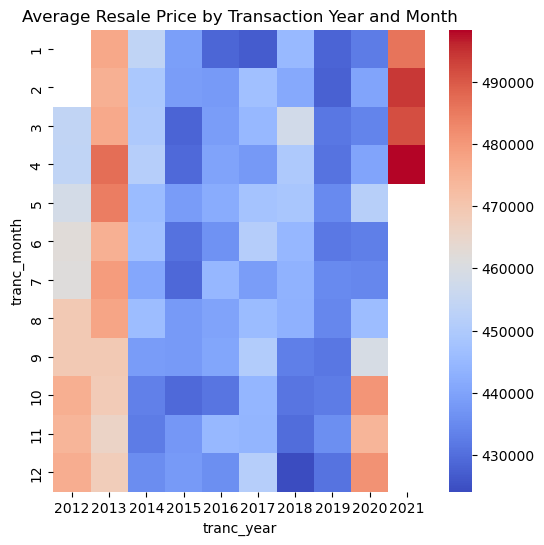

In [62]:
grouped_df = df.groupby(['tranc_month', 'tranc_year']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(6, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

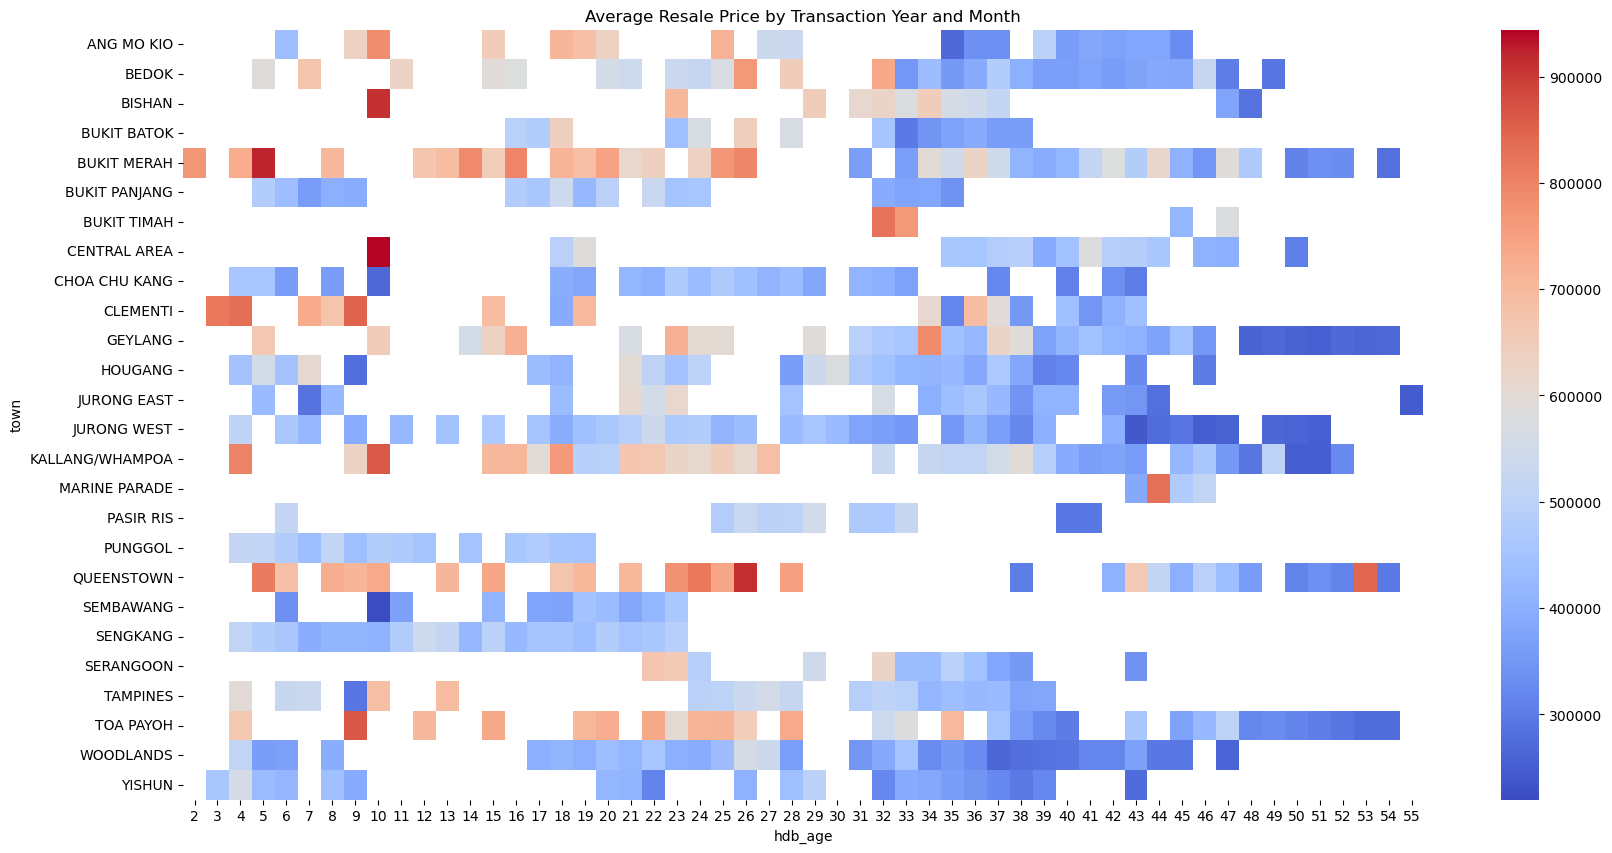

In [63]:
grouped_df = df.groupby(['town', 'hdb_age']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(20, 10))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

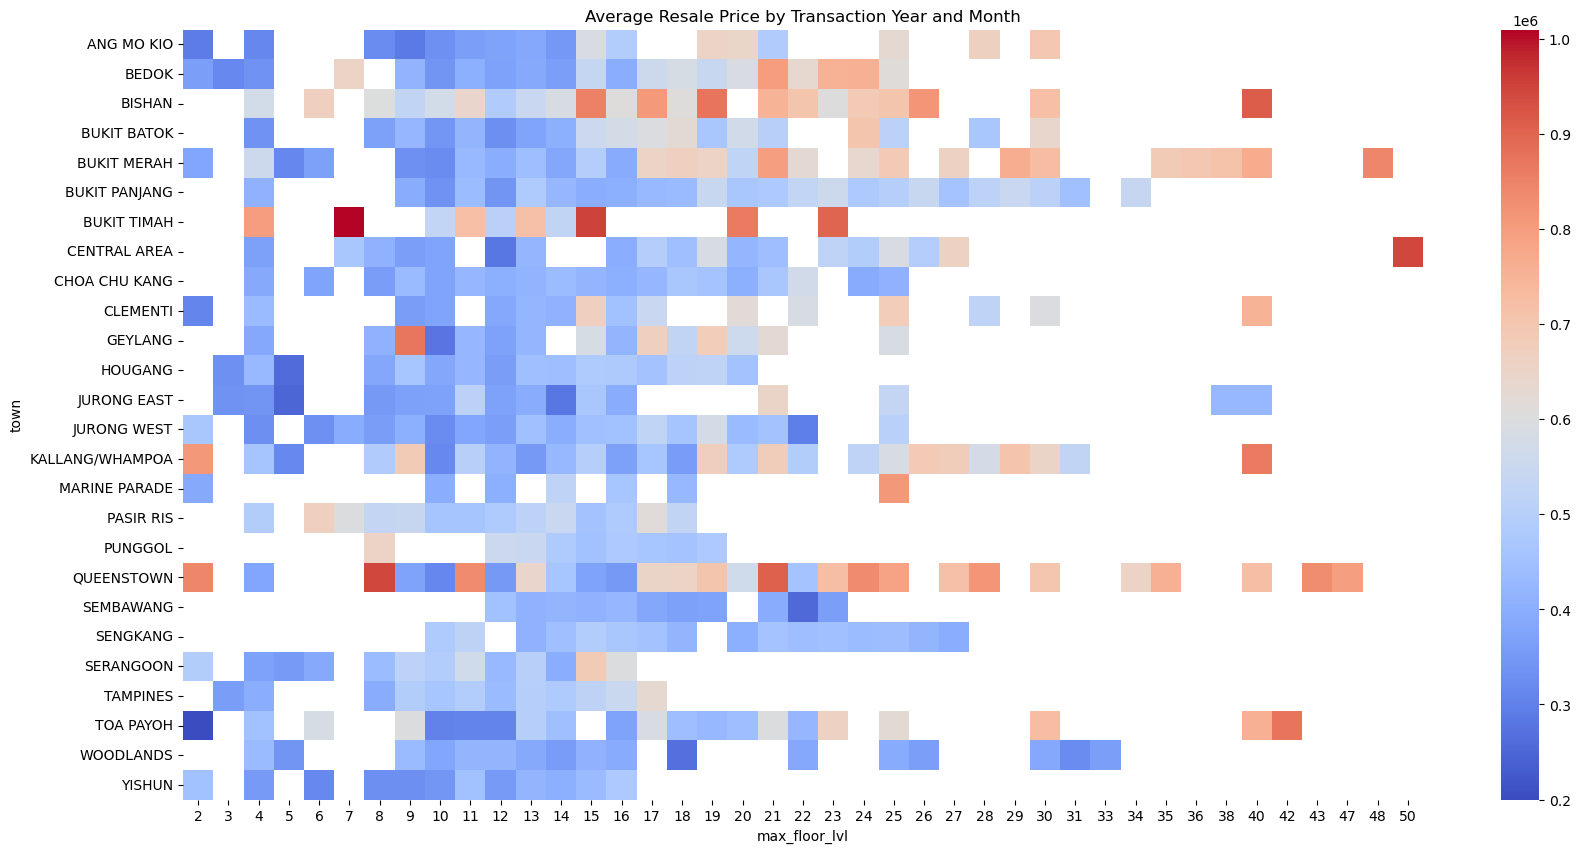

In [64]:
grouped_df = df.groupby(['town', 'max_floor_lvl']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(20, 10))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

In [65]:
df.columns

Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'address', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance'

In [66]:
df['max_floor_lvl'].value_counts().sort_index()

max_floor_lvl
2       132
3        58
4      4382
5        78
6        57
7        43
8       920
9      2940
10     8473
11     9580
12    34192
13    16975
14     8225
15     9183
16    18663
17     8004
18     4872
19     2055
20     2491
21     1698
22     2098
23      544
24     1044
25     5262
26      668
27      654
28      585
29      193
30     3096
31       70
33        4
34       55
35       95
36       54
38      141
40     2366
42      111
43      107
47       92
48        5
50      369
Name: count, dtype: int64

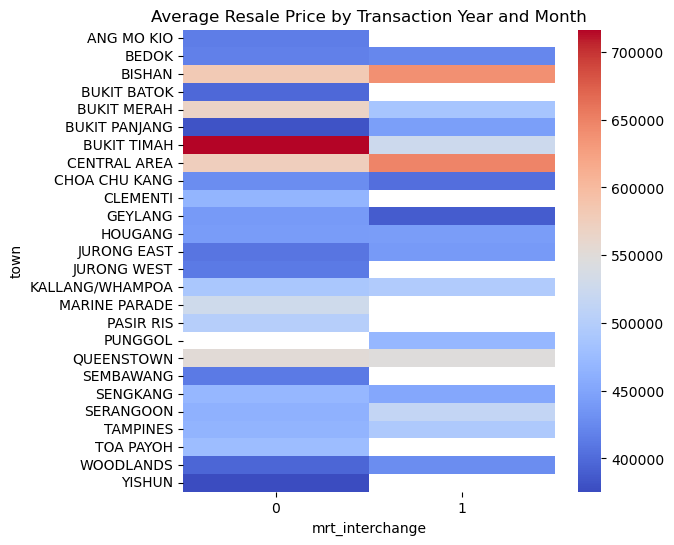

In [67]:
grouped_df = df.groupby(['town', 'mrt_interchange']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(6, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

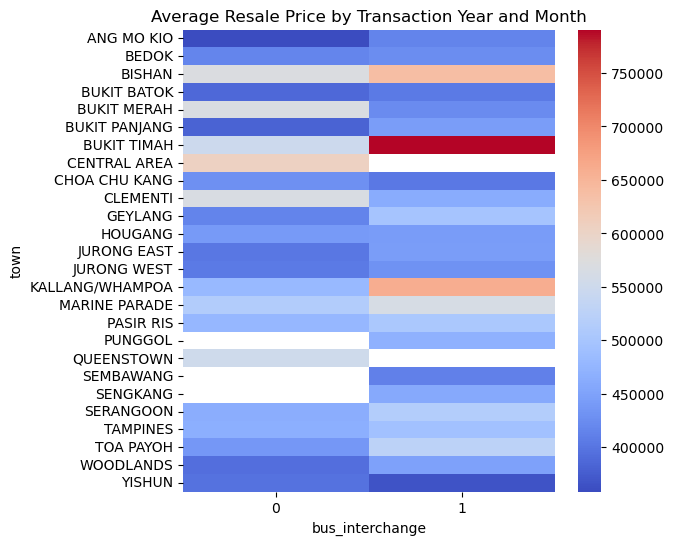

In [68]:
grouped_df = df.groupby(['town', 'bus_interchange']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(6, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

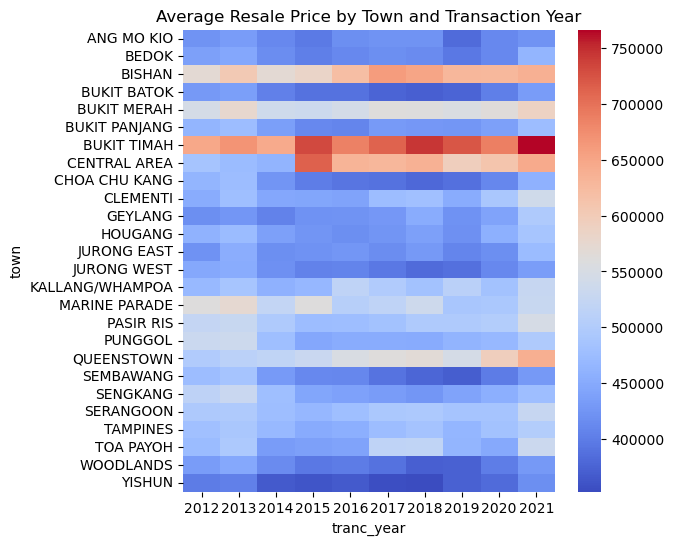

In [146]:
grouped_df = df.groupby(['town', 'tranc_year']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(6, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Town and Transaction Year")
plt.show()

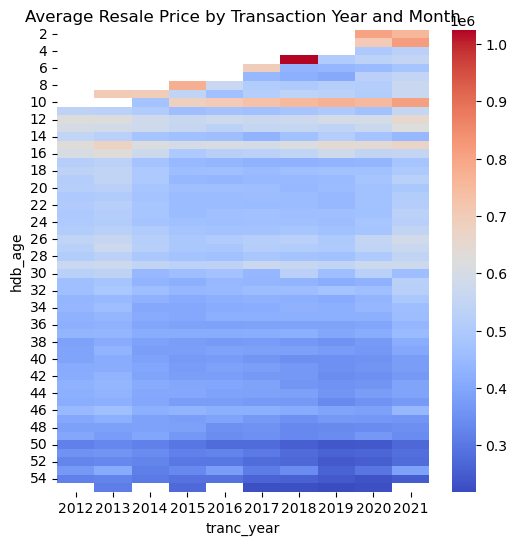

In [70]:
grouped_df = df.groupby(['hdb_age', 'tranc_year']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(6, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

In [71]:
df.columns

Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'address', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance'

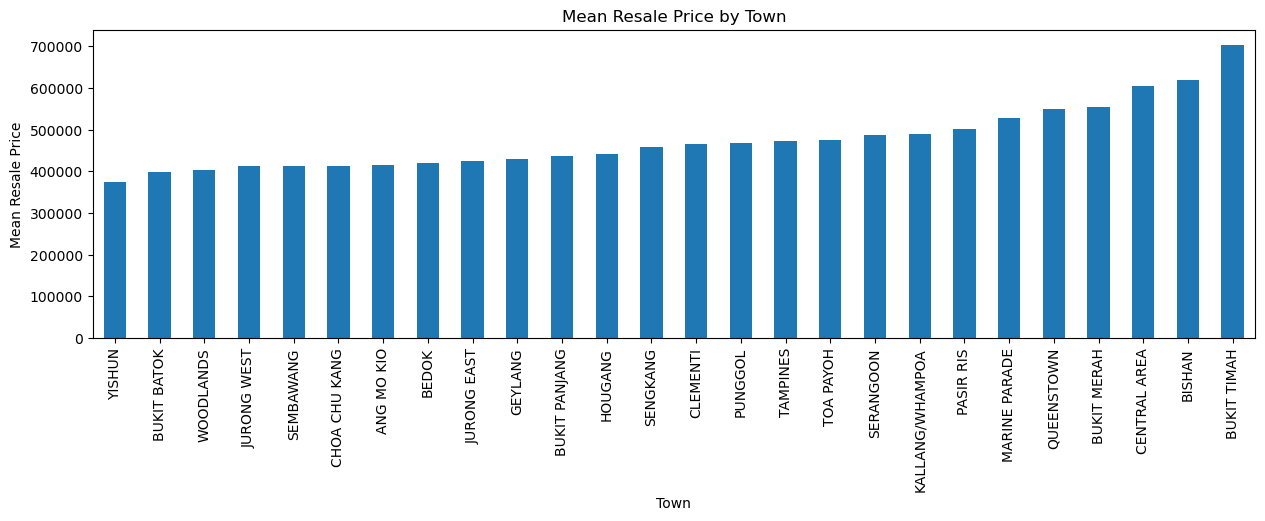

In [72]:
# Group the data by 'town' and calculate the mean resale price
mean_resale_by_town = df.groupby('town')['resale_price'].mean().sort_values()

# Create the plot
mean_resale_by_town.plot(kind='bar', figsize=(15, 4))
plt.title('Mean Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Mean Resale Price')
plt.show()

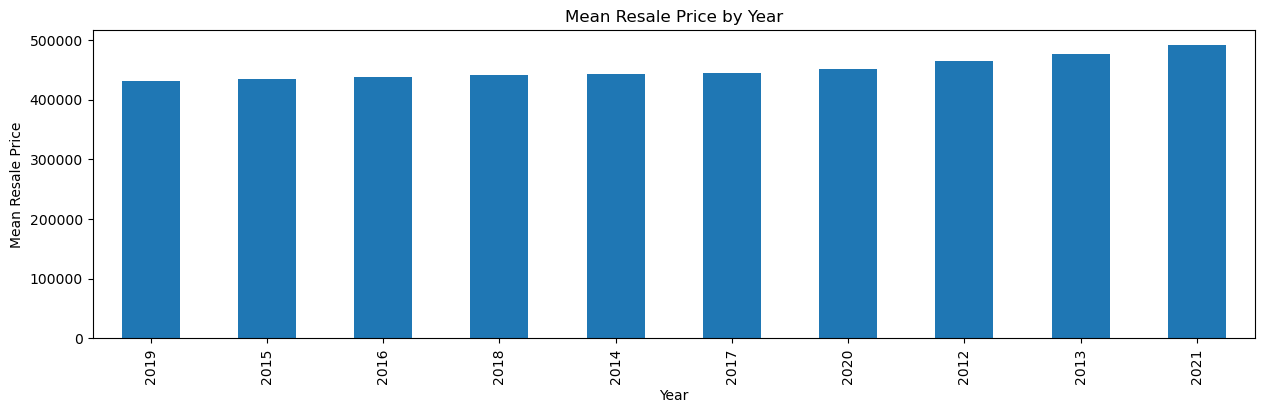

In [73]:
# Group the data by 'town' and calculate the mean resale price
mean_resale_by_year = df.groupby('tranc_year')['resale_price'].mean().sort_values()

# Create the plot
mean_resale_by_year.plot(kind='bar', figsize=(15, 4))
plt.title('Mean Resale Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Resale Price')
plt.show()

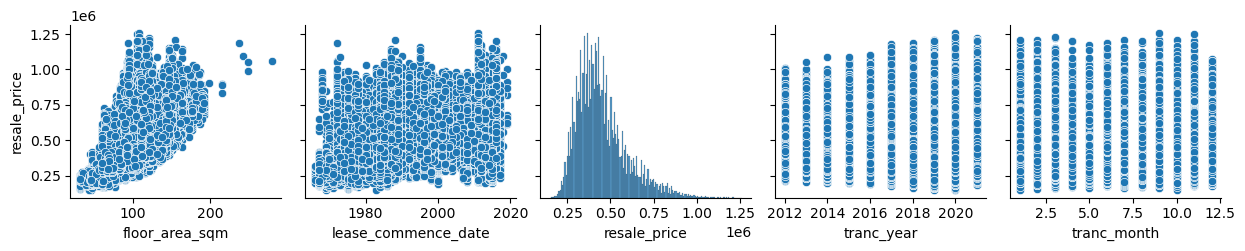

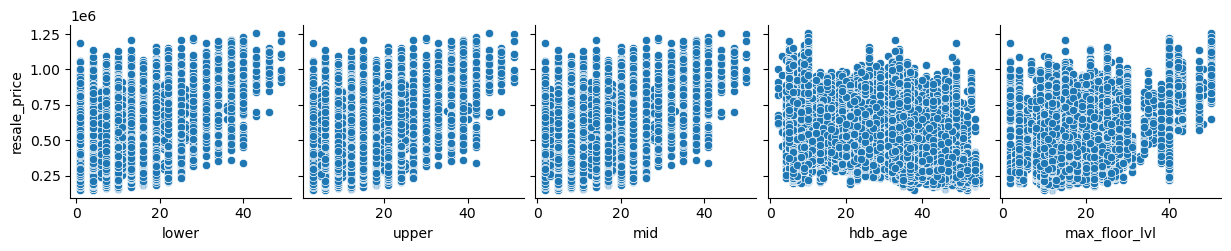

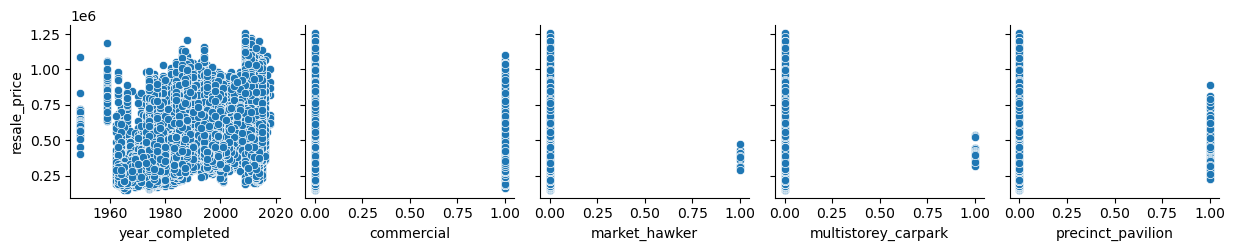

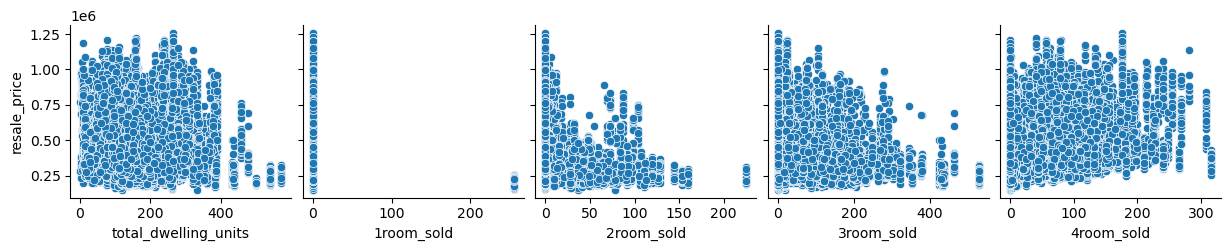

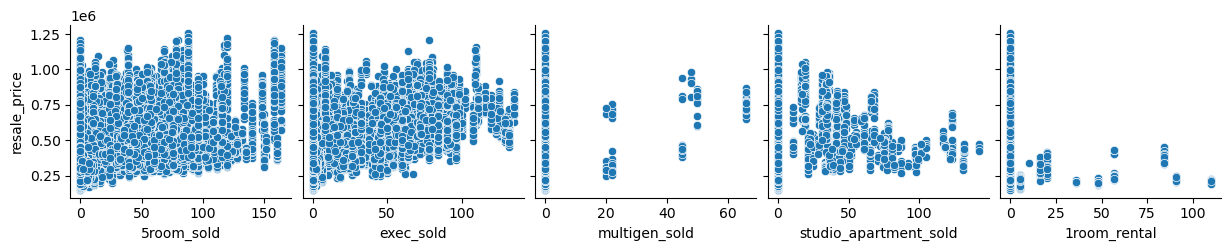

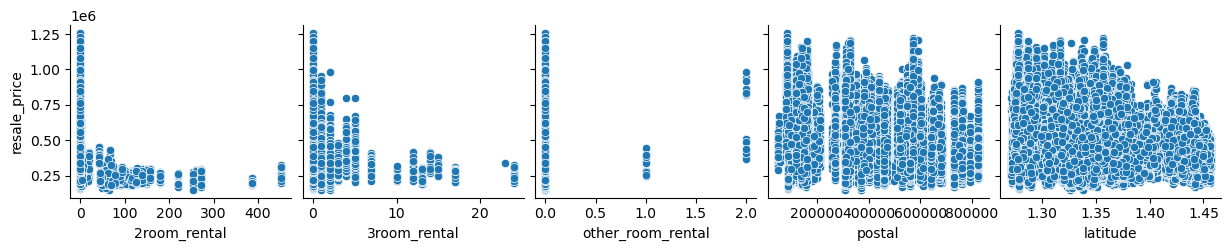

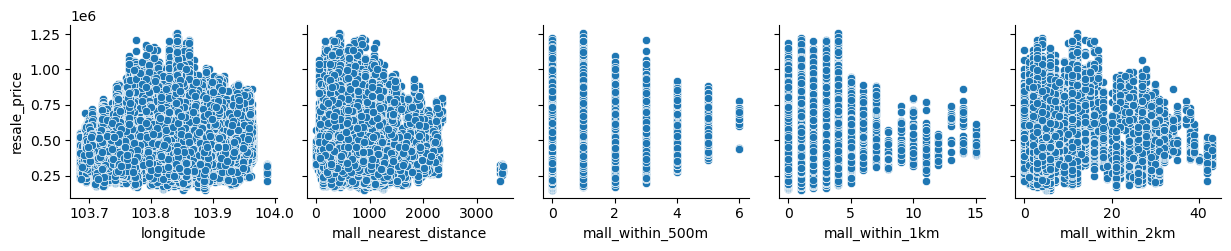

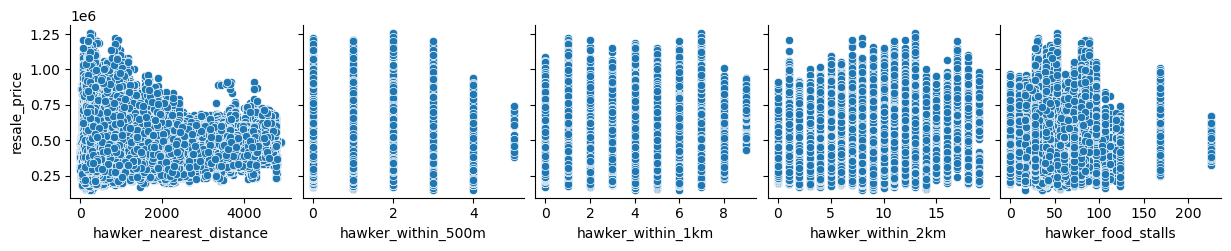

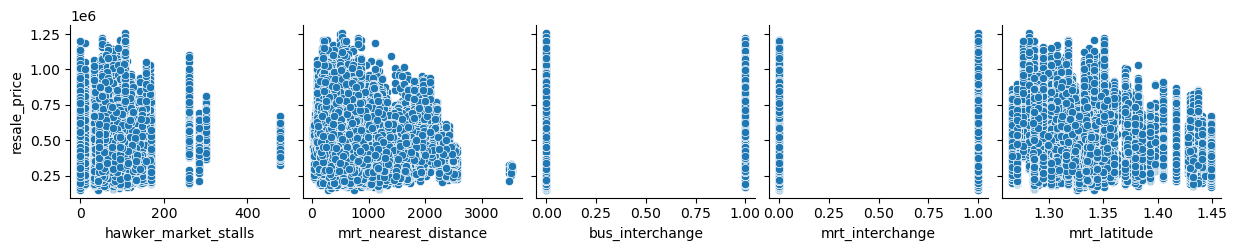

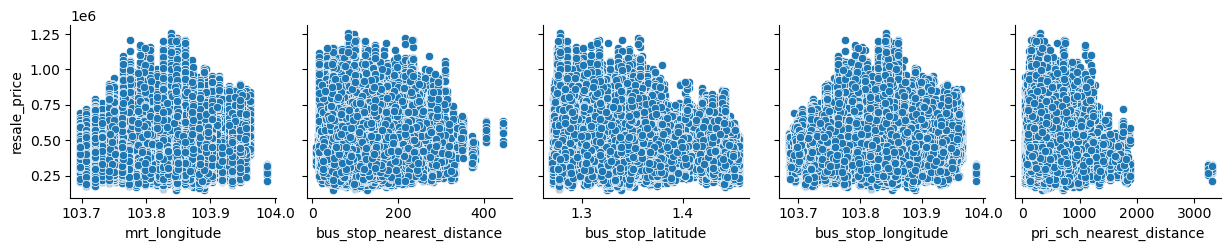

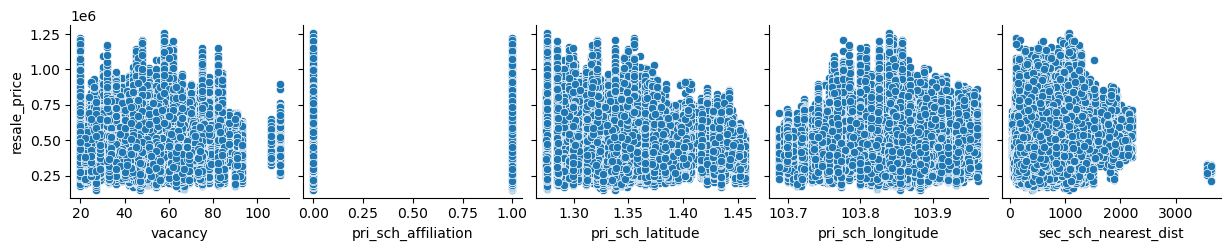

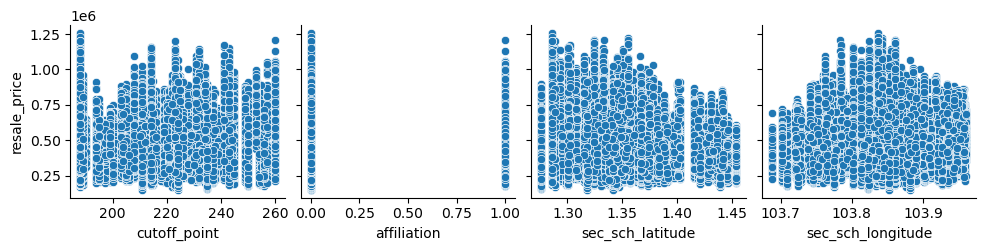

In [74]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns

for i in range(0, len(numeric_features), 5):
    sns.pairplot(df, y_vars=['resale_price'], x_vars=numeric_features[i:i+5])
    plt.show()

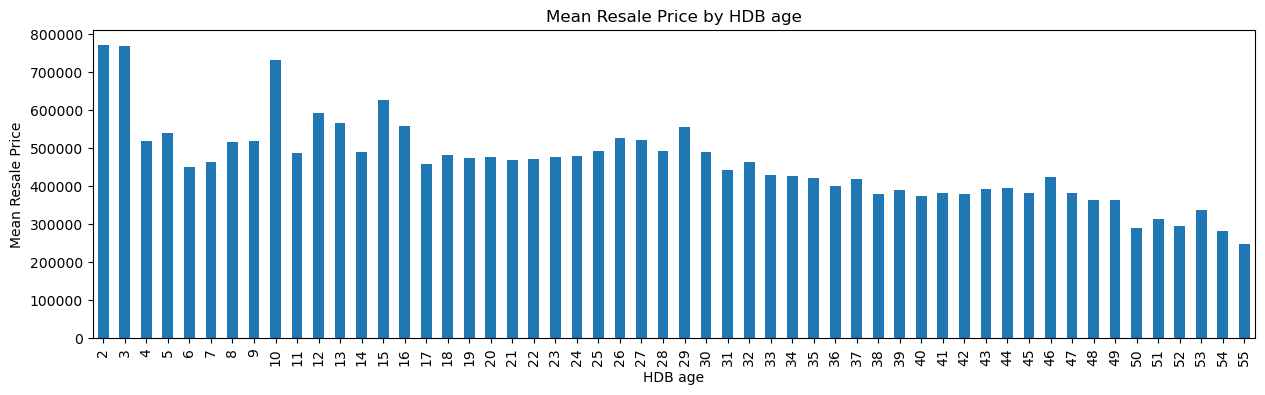

In [75]:
# Group the data by 'town' and calculate the mean resale price
mean_resale_by_town = df.groupby('hdb_age')['resale_price'].mean()

# Create the plot
mean_resale_by_town.plot(kind='bar', figsize=(15, 4))
plt.title('Mean Resale Price by HDB age')
plt.xlabel('HDB age')
plt.ylabel('Mean Resale Price')
plt.show()

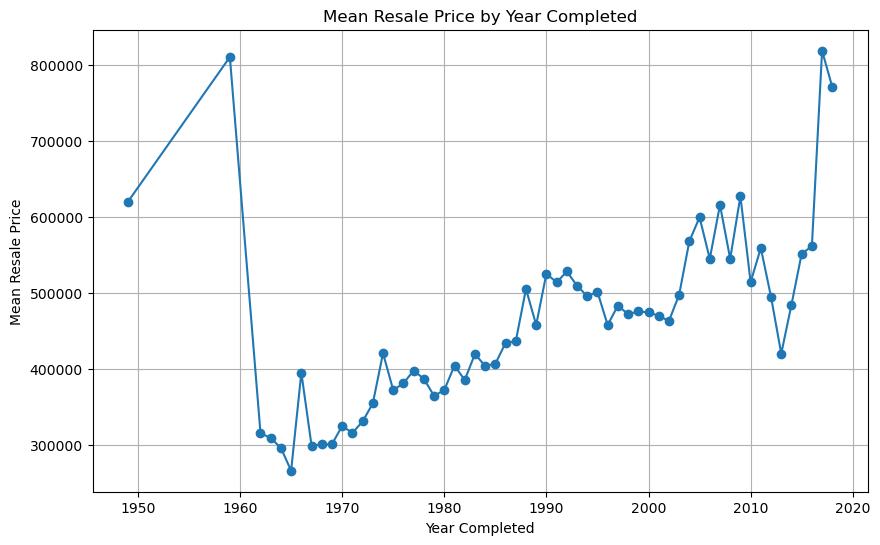

In [76]:
grouped_data = df.groupby('year_completed')['resale_price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['year_completed'], grouped_data['resale_price'], marker='o')
plt.title('Mean Resale Price by Year Completed')
plt.xlabel('Year Completed')
plt.ylabel('Mean Resale Price')
plt.grid(True)
plt.show()

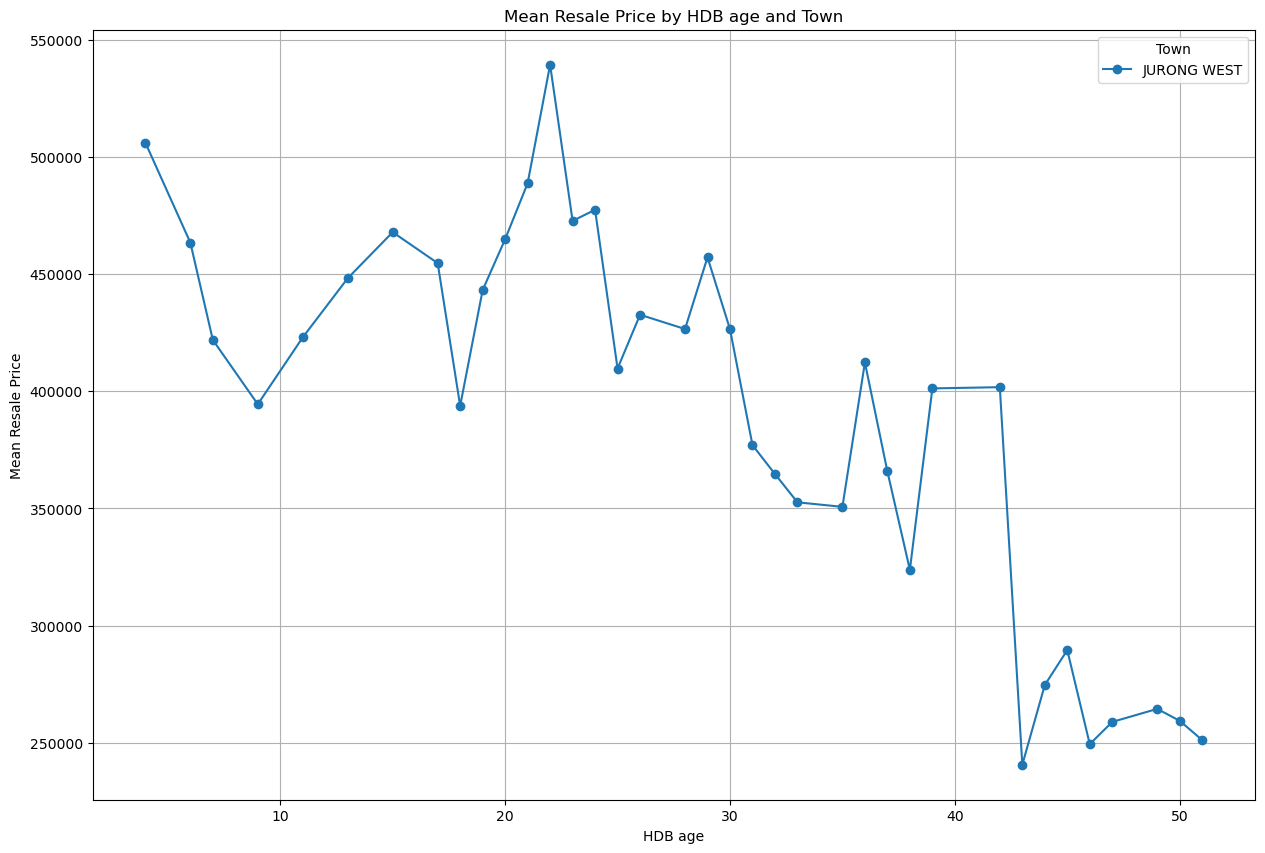

In [77]:
grouped_data = df.groupby(['town', 'hdb_age'])['resale_price'].mean().reset_index()

plt.figure(figsize=(15, 10))

for town in grouped_data['town'].unique():
    if town == 'JURONG WEST':
        town_data = grouped_data[grouped_data['town'] == town]
        plt.plot(town_data['hdb_age'], town_data['resale_price'], marker='o', label=town)

plt.title('Mean Resale Price by HDB age and Town')
plt.xlabel('HDB age')
plt.ylabel('Mean Resale Price')
plt.legend(title='Town')
plt.grid(True)
plt.show()

In [78]:
df['town']

0         KALLANG/WHAMPOA
1                  BISHAN
2             BUKIT BATOK
3                  BISHAN
4                  YISHUN
               ...       
150629          WOODLANDS
150630        JURONG WEST
150631              BEDOK
150632         QUEENSTOWN
150633             YISHUN
Name: town, Length: 150634, dtype: object

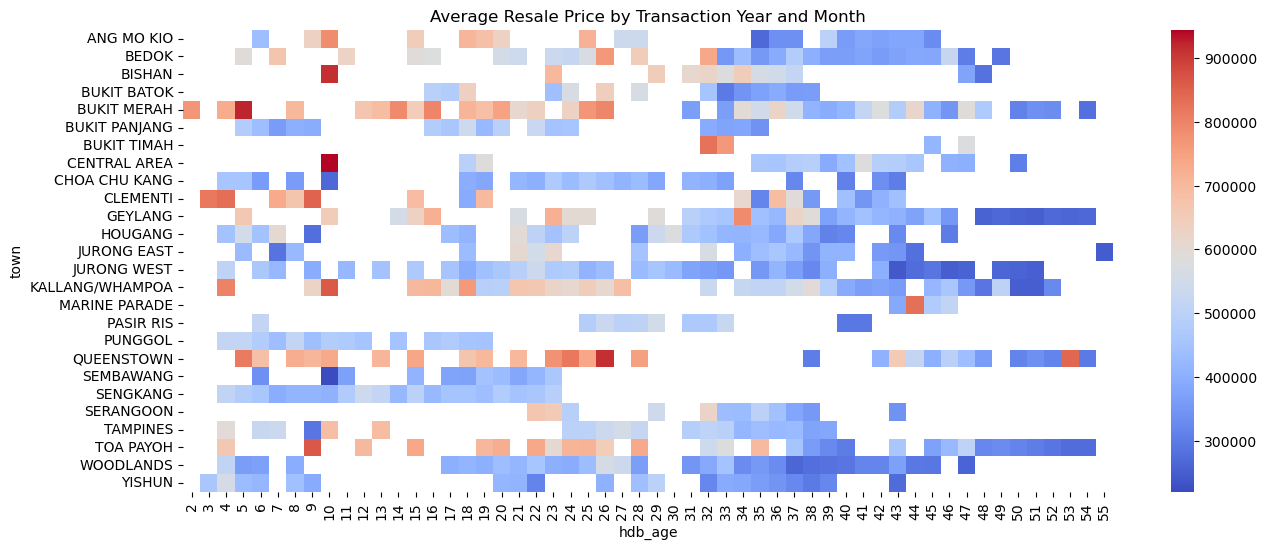

In [110]:
grouped_df = df.groupby(['town', 'hdb_age']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(15, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

In [80]:
df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [81]:
df.columns

Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'address', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance'

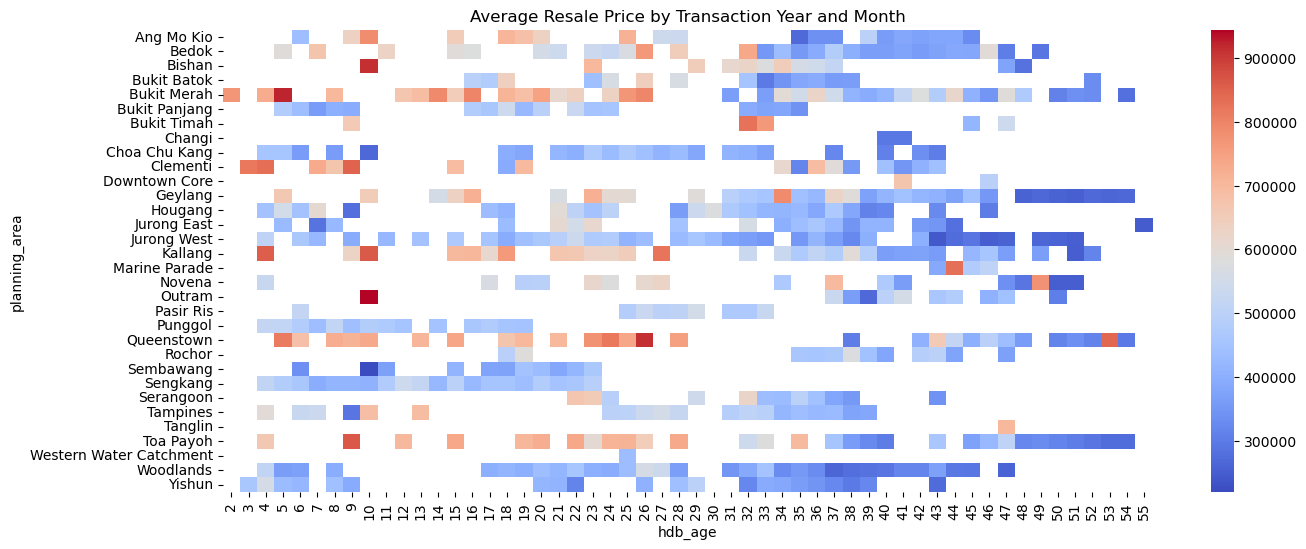

In [111]:
grouped_df = df.groupby(['planning_area', 'hdb_age']).mean(numeric_only=True)['resale_price'].unstack()
plt.figure(figsize=(15, 6))
sns.heatmap(grouped_df, cmap='coolwarm')
plt.title("Average Resale Price by Transaction Year and Month")
plt.show()

In [ ]:
features=["town", "floor_area_sqm", "mid", "hdb_age", "market_hawker", 
          "commercial", "multistorey_carpark", "mall_nearest_distance", 
          "hawker_food_stalls", "hawker_market_stalls", "mrt_nearest_distance", 
          "pri_sch_nearest_distance", "pri_sch_name", "sec_sch_name", "tranc_year", 
          "flat_type", "flat_model","max_floor_lvl","planning_area","cutoff_point"]



In [83]:
columns = ['max_floor_lvl', 'total_dwelling_units', '3room_sold', '5room_sold', 'exec_sold', 'vacancy']

for col in columns:
    df[col] = np.log1p(df[col])

In [84]:
df.to_csv('../datasets/log_train.csv', index=False)

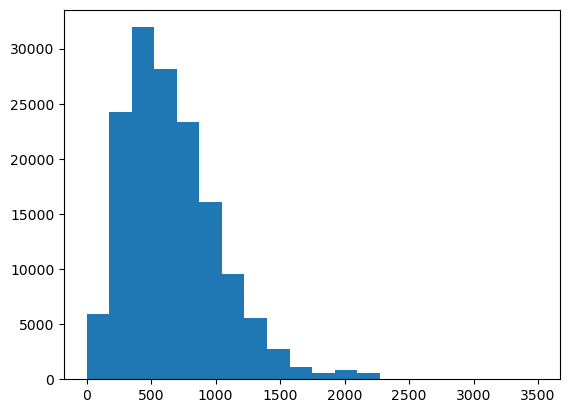

In [87]:
plt.hist(df['mall_nearest_distance'],bins=20)
plt.show()

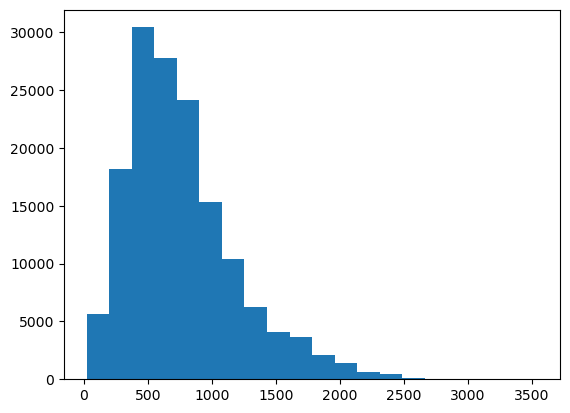

In [88]:
plt.hist(df['mrt_nearest_distance'],bins=20)
plt.show()

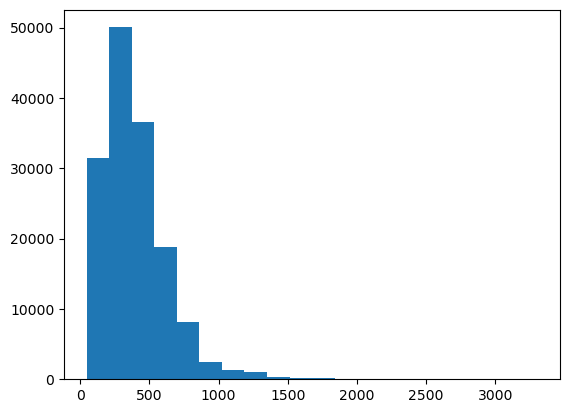

In [89]:
plt.hist(df['pri_sch_nearest_distance'],bins=20)
plt.show()

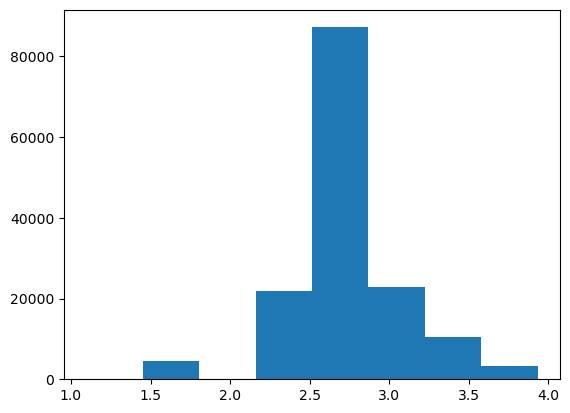

In [97]:
plt.hist(df['max_floor_lvl'],bins=8)
plt.show()

((array([-4.43509796, -4.24013178, -4.13422113, ...,  4.13422113,
          4.24013178,  4.43509796]),
  array([ 31.,  31.,  31., ..., 249., 249., 280.])),
 (24.165708962528175, 97.19763001712761, 0.9902480431708687))

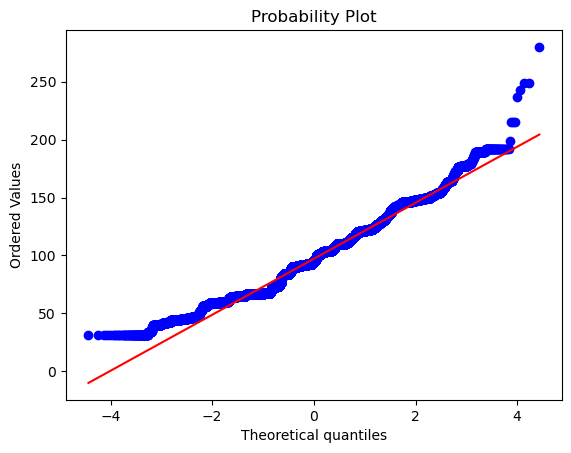

In [102]:
import scipy.stats as stats

stats.probplot(df['floor_area_sqm'], dist="norm", plot=plt)

((array([-4.43509796, -4.24013178, -4.13422113, ...,  4.13422113,
          4.24013178,  4.43509796]),
  array([1.09861229, 1.09861229, 1.09861229, ..., 3.93182563, 3.93182563,
         3.93182563])),
 (0.33494039226894945, 2.718508465803355, 0.9510765741901608))

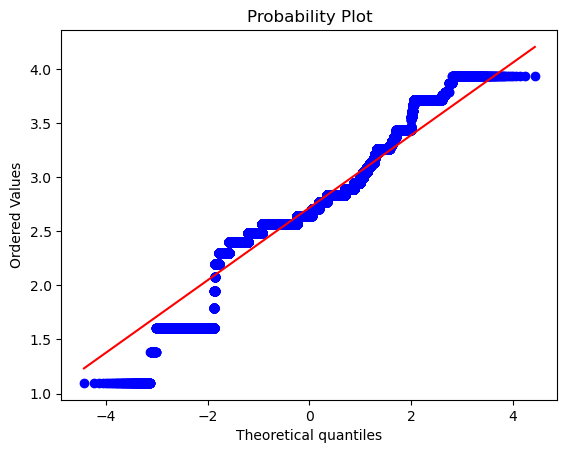

In [100]:
stats.probplot(df['max_floor_lvl'], dist="norm", plot=plt)

((array([-4.43509796, -4.24013178, -4.13422113, ...,  4.13422113,
          4.24013178,  4.43509796]),
  array([ 2,  2,  2, ..., 55, 55, 55])),
 (11.960918033571987, 28.551535509911442, 0.9853172940307646))

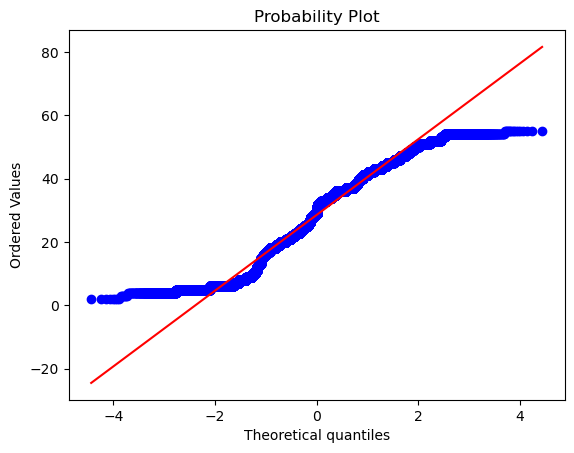

In [103]:
stats.probplot(df['hdb_age'], dist="norm", plot=plt)

(array([4.4640e+03, 8.8091e+04, 3.3335e+04, 2.1436e+04, 1.5010e+03,
        1.4780e+03, 0.0000e+00, 2.5600e+02, 0.0000e+00, 7.3000e+01]),
 array([  0. ,  22.6,  45.2,  67.8,  90.4, 113. , 135.6, 158.2, 180.8,
        203.4, 226. ]),
 <BarContainer object of 10 artists>)

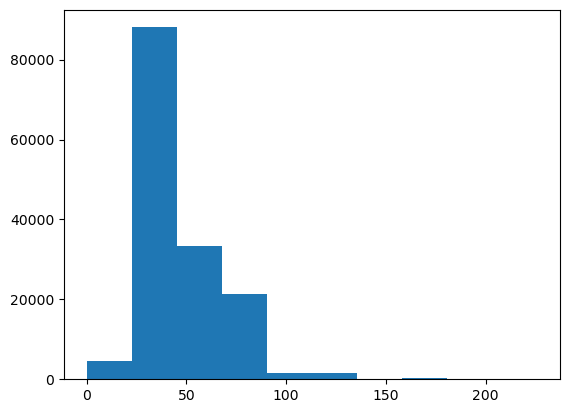

In [105]:
plt.hist(df['hawker_food_stalls'])

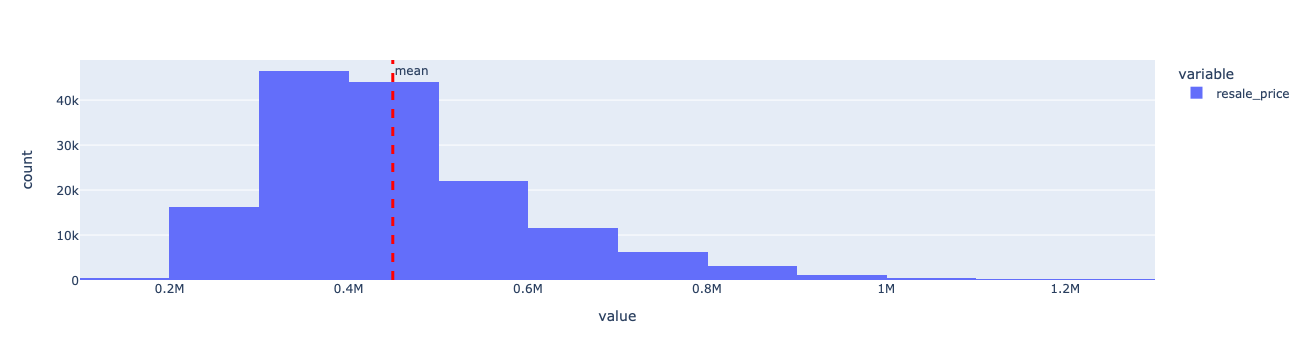

In [119]:
import plotly.express as px

fig = px.histogram(df['resale_price'], nbins=20)
fig.add_vline(x=df['resale_price'].mean(),line_width=3, line_dash="dash", line_color="red",annotation_text="mean", 
              annotation_position="top right")

fig.show()

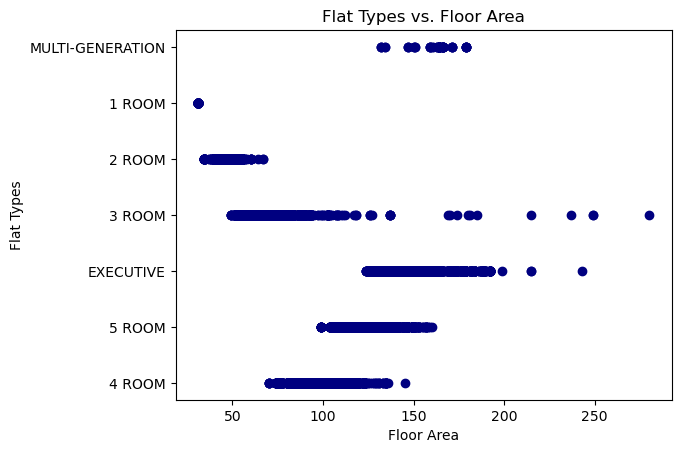

In [145]:
plt.scatter(df['floor_area_sqm'], df['flat_type'], color='navy')
plt.ylabel("Flat Types")
plt.xlabel("Floor Area")
#plt.xticks(rotation=90)
plt.title("Flat Types vs. Floor Area")
plt.show()

In [169]:
df.select_dtypes(include='int64').columns

Index(['lease_commence_date', 'tranc_year', 'tranc_month', 'lower', 'upper',
       'mid', 'hdb_age', 'max_floor_lvl', 'year_completed', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'bus_interchange', 'mrt_interchange', 'vacancy', 'pri_sch_affiliation',
       'cutoff_point', 'affiliation'],
      dtype='object')